# **MelanoAI: Intelligent Skin Cancer Screening**

---



---






#**Introduction**

Melanoma is the deadliest form of skin cancer, but early detection can
significantly increase survival rates. **MelanoAI** is designed to assist in early screening by using AI to classify skin lesions as benign or malignant based on image analysis. This tool could potentially enhance the speed and accuracy of diagnoses in clinical settings.


# **Importing Libraries**

In [ ]:
!pip install imagehash

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 30.9 MB/s eta 0:00:00


In [ ]:
!pip install Pillow
from PIL import Image, ImageOps
!pip install scikit-image
from skimage.restoration import denoise_wavelet

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
import random
import seaborn as sns
from PIL import Image
import hashlib
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate, shift, zoom
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [ ]:
import imagehash
import shutil

# **Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dir = '/content/drive/MyDrive/melanomaAI/with_duplicates/train'
test_dir = '/content/drive/MyDrive/melanomaAI/with_duplicates/test'

In [ ]:
train_benign='/content/drive/MyDrive/melanomaAI/with_duplicates/train/benign'
train_malignant='/content/drive/MyDrive/melanomaAI/with_duplicates/train/malignant'
test_benign='/content/drive/MyDrive/melanomaAI/with_duplicates/test/benign'
test_malignant='/content/drive/MyDrive/melanomaAI/with_duplicates/test/malignant'

# **Directory Structure**

### The following code block displays the structure of the dataset.

In [ ]:
def display_directory_structure(train_dir, test_dir):
    """Displays the structure of train and test directories."""

    # Helper function to generate directory structure
    def get_directory_structure(root_dir):
        structure = []
        for dirpath, dirnames, filenames in os.walk(root_dir):
            level = dirpath.replace(root_dir, '').count(os.sep)
            indent = ' ' * 2 * level
            structure.append(f'{indent}{os.path.basename(dirpath)}/')
            subindent = ' ' * 2 * (level + 1)
            for f in filenames[:5]:  # Show only first 5 files for brevity
                structure.append(f'{subindent}{f}')
        return structure

    # Get structures of train and test directories
    train_structure = get_directory_structure(train_dir)
    test_structure = get_directory_structure(test_dir)

    # Calculate max lines to print side by side
    max_lines = max(len(train_structure), len(test_structure))

    print(f"{'Train Directory Structure':<40} {'Test Directory Structure':<40}")
    print("=" * 80)
    for i in range(max_lines):
        train_line = train_structure[i] if i < len(train_structure) else ""
        test_line = test_structure[i] if i < len(test_structure) else ""
        print(f"{train_line:<40} {test_line:<40}")


display_directory_structure(train_dir, test_dir)

Train Directory Structure                Test Directory Structure                
train/                                   test/                                   
  malignant/                               benign/                               
    melanoma_8607.jpg                        melanoma_10003.jpg                  
    melanoma_8602.jpg                        melanoma_10008.jpg                  
    melanoma_8620.jpg                        melanoma_10004.jpg                  
    melanoma_8583.jpg                        melanoma_10002.jpg                  
    melanoma_8589.jpg                        melanoma_10001.jpg                  
  benign/                                  malignant/                            
    melanoma_4557.jpg                        melanoma_10148.jpg                  
    melanoma_4560.jpg                        melanoma_10122.jpg                  
    melanoma_4611.jpg                        melanoma_10110.jpg                  
    melanoma_461

## Dataset Structure

The dataset is organized into two main directories: **train and test**, which contains subdirectories for **malignant** and **benign** skin lesions. Below is the structure of the dataset:

- **train and test**: The root directory containing training images.
  - **malignant/**: Directory for images of malignant lesions (e.g., melanoma).
    - contains example image of a malignant skin lesion.
    
  - **benign/**: Directory for images of benign lesions (non-cancerous).
    - contains example image of a benign skin lesion.

### Summary
This structure allows for easy access and organization of images based on classifications. Each subdirectory contains images that belong to either the malignant or benign categories.



# **Counting Images**

In [ ]:
def display_directory_structure(train_dir, test_dir):
    """Displays the structure of train and test directories and counts images in benign and malignant folders."""

    # Get paths to benign and malignant directories within train_dir
    benign_dir = os.path.join(train_dir, 'benign')
    malignant_dir = os.path.join(train_dir, 'malignant')

    # Count images in benign and malignant directories
    num_benign = len(os.listdir(benign_dir))
    num_malignant = len(os.listdir(malignant_dir))

    # Print the count of images
    print('Number of benign images:', num_benign)
    print('Number of malignant images:', num_malignant)
    print('Total number of images in train:', num_benign + num_malignant)
    print()
    # Get paths to benign and malignant directories within train_dir
    benign_dir = os.path.join(test_dir, 'benign')
    malignant_dir = os.path.join(test_dir, 'malignant')

    # Count images in benign and malignant directories
    num_benign = len(os.listdir(benign_dir))
    num_malignant = len(os.listdir(malignant_dir))

    # Print the count of images
    print('Number of benign images:', num_benign)
    print('Number of malignant images:', num_malignant)
    print('Total number of images in test:', num_benign + num_malignant)
    print()

    # Calculate max lines to print side by side
    max_lines = max(len(train_structure), len(test_structure))

    print(f"{'Train Directory Structure':<40} {'Test Directory Structure':<40}")
    print("=" * 80)
    for i in range(max_lines):
        train_line = train_structure[i] if i < len(train_structure) else ""
        test_line = test_structure[i] if i < len(test_structure) else ""
        print(f"{train_line:<40} {test_line:<40}")


def count_images(directory, valid_extensions=('.jpg', '.jpeg', '.png')):
    """Counts the number of images in a directory with specified extensions.

    Args:
        directory: The path to the directory containing the images.
        valid_extensions: A tuple of valid image file extensions.

    Returns:
        The number of images in the directory.
    """
    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count
train_dir = '/content/drive/MyDrive/melanomaAI/with_duplicates/train'
test_dir = '/content/drive/MyDrive/melanomaAI/with_duplicates/test'

benign_train_dir = os.path.join(train_dir, 'benign')
malignant_train_dir = os.path.join(train_dir, 'malignant')
benign_test_dir = os.path.join(test_dir, 'benign')
malignant_test_dir = os.path.join(test_dir, 'malignant')

num_benign_train = count_images(benign_train_dir)
num_malignant_train = count_images(malignant_train_dir)
num_benign_test = count_images(benign_test_dir)
num_malignant_test = count_images(malignant_test_dir)

print('Number of benign images in train:', num_benign_train)
print('Number of malignant images in train:', num_malignant_train)
print('Total number of images in train:', num_benign_train + num_malignant_train)
print('Number of benign images in test:', num_benign_test)
print('Number of malignant images in test:', num_malignant_test)
print('Total number of images in test:', num_benign_test + num_malignant_test)

Number of benign images in train: 5000
Number of malignant images in train: 4605
Total number of images in train: 9605
Number of benign images in test: 500
Number of malignant images in test: 500
Total number of images in test: 1000


# **Exploration of Data  with Visualizations**

### To better understand our dataset, we’ll use visualizations to analyze about image data

# **Distribution of Benign vs Malignant Images in train directory**

In [ ]:
benign_dir = os.path.join(train_dir, 'benign')
malignant_dir = os.path.join(train_dir, 'malignant')

<ipython-input-9-798067257973>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="coolwarm")


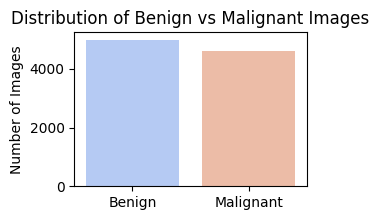

In [ ]:
# Create a barplot for the distribution of benign vs malignant images
labels = ['Benign', 'Malignant']
counts = [num_benign_train, num_malignant_train]
plt.figure(figsize=(3,2))
sns.barplot(x=labels, y=counts, palette="coolwarm")
plt.title('Distribution of Benign vs Malignant Images')
plt.ylabel('Number of Images')
plt.show()

**Benign is greater than malignant, the benign bar will be taller, indicating a higher number of benign images.**

# **Distribution of Benign vs Malignant Images in test directory**

<ipython-input-106-fe763f05e52f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="coolwarm")


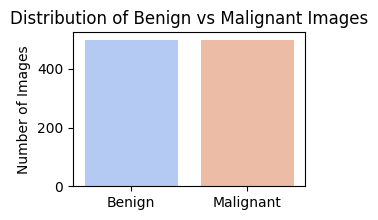

In [ ]:
# Create a barplot for the distribution of benign vs malignant images
labels = ['Benign', 'Malignant']
counts = [num_benign, num_malignant]
plt.figure(figsize=(3,2))
sns.barplot(x=labels, y=counts, palette="coolwarm")
plt.title('Distribution of Benign vs Malignant Images')
plt.ylabel('Number of Images')
plt.show()

#key findings:
**Since both categories have the same count, the heights of the bars representing benign and malignant images are equal, which indicates a balanced dataset.**

# **Pie Chart for Class Distribution in train directory**

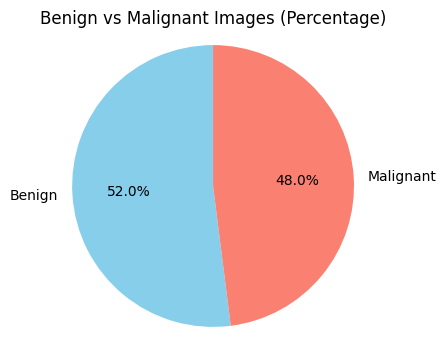

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Benign vs Malignant Images (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

**The pie chart will show 52.0% for benign images (in sky blue) and 48.0% for malignant images (in salmon). It provides a clear visual representation of the class distribution, indicating a slight bias toward benign images while still showing a significant presence of malignant cases.**

# **Pie Chart for Class Distribution in test directory**

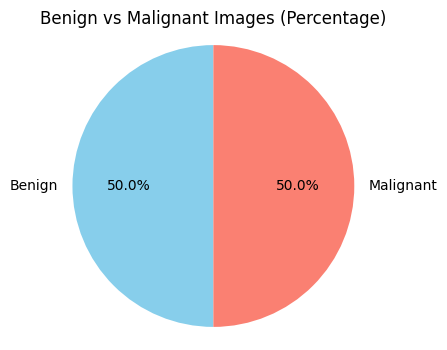

In [ ]:
# Pie chart for class distribution
plt.figure(figsize=(4, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=90)
plt.title('Benign vs Malignant Images (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

key findings:

**The pie chart provides a quick visual summary of the dataset's composition. Since both categories are equal, it reinforces the idea of a balanced dataset, which is critical for accurate analysis and modeling.**

# **Image Size Distribution in train directory**

### visualizing the distribution of image sizes (in bytes) for both benign and malignant images using a histogram.

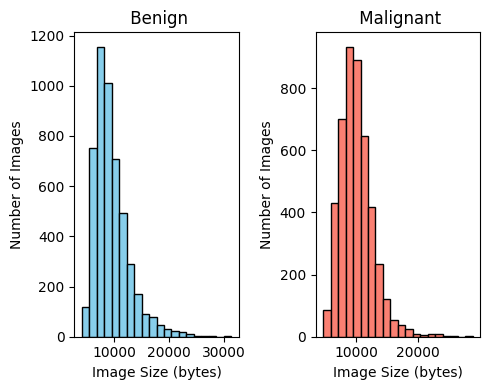

In [ ]:
def plot_image_size_distribution_side_by_side(benign_dir, malignant_dir):
    sizes_benign = []
    sizes_malignant = []

    # Collect image sizes for benign
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            sizes_benign.append(os.path.getsize(filepath))

    # Collect image sizes for malignant
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            sizes_malignant.append(os.path.getsize(filepath))


    plt.figure(figsize=(5,4))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.hist(sizes_benign, bins=20, color='skyblue', edgecolor='black')
    plt.title(' Benign')
    plt.xlabel('Image Size (bytes)')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.hist(sizes_malignant, bins=20, color='salmon', edgecolor='black')
    plt.title(' Malignant')
    plt.xlabel('Image Size (bytes)')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot image size distribution for benign and malignant images side by side
plot_image_size_distribution_side_by_side(benign_dir, malignant_dir)



*   The left histogram represents the distribution of sizes for benign images, showing how many images fall within various size ranges (in bytes).
*   The right histogram represents the sizes for malignant images, similarly displaying the distribution.





# **Average Color Intensities for Benign and Malignant Images in train directory**

In [ ]:
def analyze_color_channels(directory):
  """Analyzes color channel statistics for images in a directory."""

  red_means = []
  green_means = []
  blue_means = []

  for filename in os.listdir(directory):
    if filename.endswith(('.jpg', '.png')):
      filepath = os.path.join(directory, filename)
      image = mpimg.imread(filepath)

      if len(image.shape) == 3:  # Check if image is RGB
        red_means.append(np.mean(image[:, :, 0]))
        green_means.append(np.mean(image[:, :, 1]))
        blue_means.append(np.mean(image[:, :, 2]))

  print(f"Color channel statistics for {directory}:")
  print(f"  Average red channel mean: {np.mean(red_means)}")
  print(f"  Average green channel mean: {np.mean(green_means)}")
  print(f"  Average blue channel mean: {np.mean(blue_means)}")

# Analyze color channel statistics in benign and malignant directories
analyze_color_channels(benign_dir)
analyze_color_channels(malignant_dir)

Color channel statistics for /content/drive/MyDrive/train/benign:
  Average red channel mean: 206.05438310666668
  Average green channel mean: 158.92607726
  Average blue channel mean: 151.75133087999998
Color channel statistics for /content/drive/MyDrive/train/malignant:
  Average red channel mean: 158.01874354380388
  Average green channel mean: 129.35336814044214
  Average blue channel mean: 125.40555718104318


### visualizing the average color intensities (red, green, and blue channels) to see any differences in the color distributions between benign and malignant images.

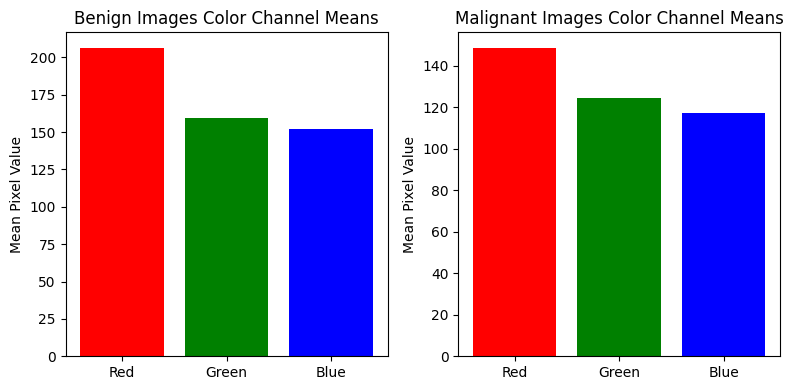

In [ ]:
def plot_color_channel_distribution(benign_dir, malignant_dir):
    red_benign, green_benign, blue_benign = [], [], []
    red_malignant, green_malignant, blue_malignant = [], [], []

    # Collect color channel statistics for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)
            red_benign.append(np.mean(image[:, :, 0]))
            green_benign.append(np.mean(image[:, :, 1]))
            blue_benign.append(np.mean(image[:, :, 2]))

    # Collect color channel statistics for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)
            red_malignant.append(np.mean(image[:, :, 0]))
            green_malignant.append(np.mean(image[:, :, 1]))
            blue_malignant.append(np.mean(image[:, :, 2]))

    # Set up the side-by-side plots for color channel means
    plt.figure(figsize=(8, 4))

    # Benign images
    plt.subplot(1, 2, 1)
    plt.bar(['Red', 'Green', 'Blue'],
            [np.mean(red_benign), np.mean(green_benign), np.mean(blue_benign)],
            color=['red', 'green', 'blue'])
    plt.title('Benign Images Color Channel Means')
    plt.ylabel('Mean Pixel Value')

    # Malignant images
    plt.subplot(1, 2, 2)
    plt.bar(['Red', 'Green', 'Blue'],
            [np.mean(red_malignant), np.mean(green_malignant), np.mean(blue_malignant)],
            color=['red', 'green', 'blue'])
    plt.title('Malignant Images Color Channel Means')
    plt.ylabel('Mean Pixel Value')

    plt.tight_layout()
    plt.show()

# Call the function to plot color channel distribution
plot_color_channel_distribution(benign_dir, malignant_dir)


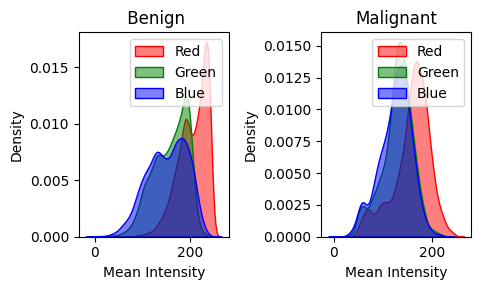

In [ ]:
def plot_color_channel_means_side_by_side(benign_dir, malignant_dir):
    red_means_benign, green_means_benign, blue_means_benign = [], [], []
    red_means_malignant, green_means_malignant, blue_means_malignant = [], [], []

    # Collect color channel means for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's an RGB image
                red_means_benign.append(np.mean(image[:, :, 0]))
                green_means_benign.append(np.mean(image[:, :, 1]))
                blue_means_benign.append(np.mean(image[:, :, 2]))

    # Collect color channel means for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's an RGB image
                red_means_malignant.append(np.mean(image[:, :, 0]))
                green_means_malignant.append(np.mean(image[:, :, 1]))
                blue_means_malignant.append(np.mean(image[:, :, 2]))

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    sns.kdeplot(red_means_benign, color='red', label='Red', fill=True, alpha=0.5)
    sns.kdeplot(green_means_benign, color='green', label='Green', fill=True, alpha=0.5)
    sns.kdeplot(blue_means_benign, color='blue', label='Blue', fill=True, alpha=0.5)
    plt.title(' Benign')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Density')
    plt.legend()

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    sns.kdeplot(red_means_malignant, color='red', label='Red', fill=True, alpha=0.5)
    sns.kdeplot(green_means_malignant, color='green', label='Green', fill=True, alpha=0.5)
    sns.kdeplot(blue_means_malignant, color='blue', label='Blue', fill=True, alpha=0.5)
    plt.title('Malignant')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot color channel intensity distributions for benign and malignant images side by side
plot_color_channel_means_side_by_side(benign_dir, malignant_dir)



### Summary
The results indicate that benign images tend to have higher average pixel intensity in all three color channels compared to malignant images, suggesting potential visual characteristics that could be leveraged for image classification tasks.



# **Average Color Intensities for Benign and Malignant Images in test directory**

In [ ]:
def analyze_color_channels(directory):
  """Analyzes color channel statistics for images in a directory."""

  red_means = []
  green_means = []
  blue_means = []

  for filename in os.listdir(directory):
    if filename.endswith(('.jpg', '.png')):
      filepath = os.path.join(directory, filename)
      image = mpimg.imread(filepath)

      if len(image.shape) == 3:  # Check if image is RGB
        red_means.append(np.mean(image[:, :, 0]))
        green_means.append(np.mean(image[:, :, 1]))
        blue_means.append(np.mean(image[:, :, 2]))

  print(f"Color channel statistics for {directory}:")
  print(f"  Average red channel mean: {np.mean(red_means)}")
  print(f"  Average green channel mean: {np.mean(green_means)}")
  print(f"  Average blue channel mean: {np.mean(blue_means)}")

# Analyze color channel statistics in benign and malignant directories
analyze_color_channels(benign_dir)
analyze_color_channels(malignant_dir)

Color channel statistics for /content/drive/MyDrive/test/benign:
  Average red channel mean: 206.43142366666666
  Average green channel mean: 159.22930915555557
  Average blue channel mean: 151.91359775555557
Color channel statistics for /content/drive/MyDrive/test/malignant:
  Average red channel mean: 148.7057547111111
  Average green channel mean: 124.38191124444445
  Average blue channel mean: 117.10545828888888


### visualizing the average color intensities (red, green, and blue channels) to see any differences in the color distributions between benign and malignant images.

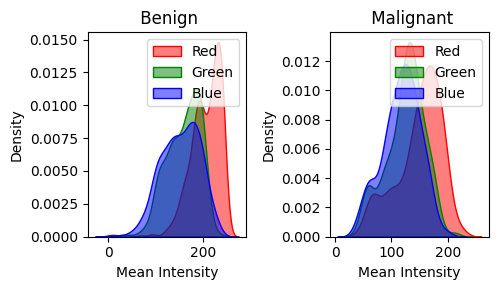

In [ ]:
def plot_color_channel_means_side_by_side(benign_dir, malignant_dir):
    red_means_benign, green_means_benign, blue_means_benign = [], [], []
    red_means_malignant, green_means_malignant, blue_means_malignant = [], [], []

    # Collect color channel means for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's an RGB image
                red_means_benign.append(np.mean(image[:, :, 0]))
                green_means_benign.append(np.mean(image[:, :, 1]))
                blue_means_benign.append(np.mean(image[:, :, 2]))

    # Collect color channel means for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's an RGB image
                red_means_malignant.append(np.mean(image[:, :, 0]))
                green_means_malignant.append(np.mean(image[:, :, 1]))
                blue_means_malignant.append(np.mean(image[:, :, 2]))

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    sns.kdeplot(red_means_benign, color='red', label='Red', fill=True, alpha=0.5)
    sns.kdeplot(green_means_benign, color='green', label='Green', fill=True, alpha=0.5)
    sns.kdeplot(blue_means_benign, color='blue', label='Blue', fill=True, alpha=0.5)
    plt.title(' Benign')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Density')
    plt.legend()

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    sns.kdeplot(red_means_malignant, color='red', label='Red', fill=True, alpha=0.5)
    sns.kdeplot(green_means_malignant, color='green', label='Green', fill=True, alpha=0.5)
    sns.kdeplot(blue_means_malignant, color='blue', label='Blue', fill=True, alpha=0.5)
    plt.title(' Malignant')
    plt.xlabel('Mean Intensity')
    plt.ylabel('Density')
    plt.legend()

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot color channel intensity distributions for benign and malignant images side by side
plot_color_channel_means_side_by_side(benign_dir, malignant_dir)

# **Image Resolution (Shape) Distribution**

## using a bar chart to see the unique resolutions (shapes) of images in both class.

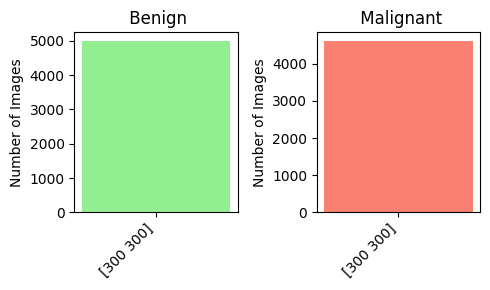

In [ ]:
def plot_image_shapes(benign_dir, malignant_dir):
    shapes_benign = []
    shapes_malignant = []

    # Collect image shapes for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)
            shapes_benign.append(image.shape[:2])  # Store image height and width only

    # Collect image shapes for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)
            shapes_malignant.append(image.shape[:2])  # Store image height and width only

    # Get unique shapes and counts for benign images
    unique_shapes_benign, counts_benign = np.unique(shapes_benign, axis=0, return_counts=True)

    # Get unique shapes and counts for malignant images
    unique_shapes_malignant, counts_malignant = np.unique(shapes_malignant, axis=0, return_counts=True)

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.bar([str(shape) for shape in unique_shapes_benign], counts_benign, color='lightgreen')
    plt.title(' Benign')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.bar([str(shape) for shape in unique_shapes_malignant], counts_malignant, color='salmon')
    plt.title(' Malignant')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot image shape distribution for benign and malignant images side by side
plot_image_shapes(benign_dir, malignant_dir)

### Summary
**Both benign and malignant images share the dimension 300x300 pixels, meaning that these two categories have a common format or standard size for images.**

### using a bar chart to see the unique resolutions (shapes) of images in both subdirectories.

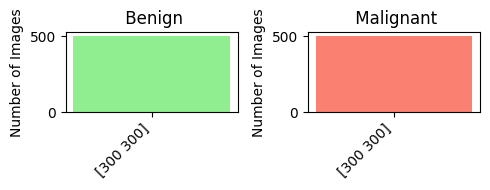

In [ ]:
def plot_image_shapes(benign_dir, malignant_dir):
    shapes_benign = []
    shapes_malignant = []

    # Collect image shapes for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)
            shapes_benign.append(image.shape[:2])  # Store image height and width only

    # Collect image shapes for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)
            shapes_malignant.append(image.shape[:2])  # Store image height and width only

    # Get unique shapes and counts for benign images
    unique_shapes_benign, counts_benign = np.unique(shapes_benign, axis=0, return_counts=True)

    # Get unique shapes and counts for malignant images
    unique_shapes_malignant, counts_malignant = np.unique(shapes_malignant, axis=0, return_counts=True)

    # Set up the side-by-side plots
    plt.figure(figsize=(5,2))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.bar([str(shape) for shape in unique_shapes_benign], counts_benign, color='lightgreen')
    plt.title(' Benign')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.bar([str(shape) for shape in unique_shapes_malignant], counts_malignant, color='salmon')
    plt.title(' Malignant')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot image shape distribution for benign and malignant images side by side
plot_image_shapes(benign_dir, malignant_dir)

# Aspect Ratio Analysis

Analyzing the aspect ratio of images (width/height) can give insight into how images are proportionally shaped, which may affect the model's performance.

Benign Aspect Ratios - Min: 1.0, Max: 1.0, Mean: 1.0
Malignant Aspect Ratios - Min: 1.0, Max: 1.0, Mean: 1.0


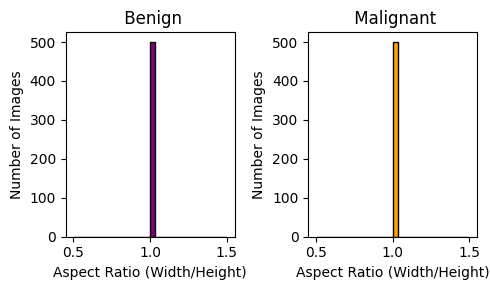

In [ ]:
def plot_aspect_ratio_distribution_side_by_side(benign_dir, malignant_dir):
    aspect_ratios_benign = []
    aspect_ratios_malignant = []

    # Collect aspect ratios for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]
            aspect_ratio = width / height
            aspect_ratios_benign.append(aspect_ratio)

    # Collect aspect ratios for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]
            aspect_ratio = width / height
            aspect_ratios_malignant.append(aspect_ratio)

    # Print statistics
    print("Benign Aspect Ratios - Min: {}, Max: {}, Mean: {}".format(
        min(aspect_ratios_benign), max(aspect_ratios_benign), np.mean(aspect_ratios_benign)))
    print("Malignant Aspect Ratios - Min: {}, Max: {}, Mean: {}".format(
        min(aspect_ratios_malignant), max(aspect_ratios_malignant), np.mean(aspect_ratios_malignant)))

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.hist(aspect_ratios_benign, bins=30, color='purple', edgecolor='black')
    plt.title(' Benign')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.hist(aspect_ratios_malignant, bins=30, color='orange', edgecolor='black')
    plt.title(' Malignant')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot aspect ratio distribution for benign and malignant images side by side
plot_aspect_ratio_distribution_side_by_side(benign_dir, malignant_dir)

### Summary
**The aspect ratios for both benign and malignant images are consistently showing as 1.0 (with minimum, maximum, and mean all equal to 1.0)**

### Analyzing the aspect ratio of images (width/height) can give insight into how images are proportionally shaped, which may affect the model's performance.

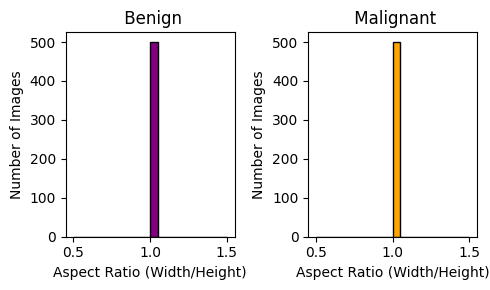

In [ ]:
def plot_aspect_ratio_distribution_side_by_side(benign_dir, malignant_dir):
    aspect_ratios_benign = []
    aspect_ratios_malignant = []

    # Collect aspect ratios for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]
            aspect_ratio = width / height
            aspect_ratios_benign.append(aspect_ratio)

    # Collect aspect ratios for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]
            aspect_ratio = width / height
            aspect_ratios_malignant.append(aspect_ratio)

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.hist(aspect_ratios_benign, bins=20, color='purple', edgecolor='black')
    plt.title(' Benign')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.hist(aspect_ratios_malignant, bins=20, color='orange', edgecolor='black')
    plt.title(' Malignant')
    plt.xlabel('Aspect Ratio (Width/Height)')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot aspect ratio distribution for benign and malignant images side by side
plot_aspect_ratio_distribution_side_by_side(benign_dir, malignant_dir)

# Gray Scale Images Analysis

In some datasets, not all images are in RGB format. You can check how many images are grayscale (single-channel) and visualize them to see if they differ between the classes.

In [ ]:
def analyze_grayscale_images(directory, label):
    grayscale_count = 0

    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 2:  # Grayscale images have only 2 dimensions
                grayscale_count += 1

    print(f"Number of grayscale images in {label}: {grayscale_count}")

# Analyze grayscale images in benign and malignant directories
analyze_grayscale_images(benign_dir, 'Benign')
analyze_grayscale_images(malignant_dir, 'Malignant')

Number of grayscale images in Benign: 0
Number of grayscale images in Malignant: 0


### Summary
**There is no greyscale images in this train directory.**

### In some datasets, not all images are in RGB format. You can check how many images are grayscale (single-channel) and visualize them to see if they differ between the classes.

In [ ]:
def analyze_grayscale_images(directory, label):
    grayscale_count = 0

    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 2:  # Grayscale images have only 2 dimensions
                grayscale_count += 1

    print(f"Number of grayscale images in {label}: {grayscale_count}")

# Analyze grayscale images in benign and malignant directories
analyze_grayscale_images(benign_dir, 'Benign')
analyze_grayscale_images(malignant_dir, 'Malignant')

Number of grayscale images in Benign: 0
Number of grayscale images in Malignant: 0


# Image Brightness Distribution

Checking the brightness levels of images can help you understand whether any preprocessing (like normalization or histogram equalization) is needed. We'll calculate the brightness as the average of the pixel intensities.

Benign Brightness - Min: 27.07517037037037 Max: 238.82364444444445 Mean: 172.24393041555555
Malignant Brightness - Min: 32.65195555555555 Max: 224.0414851851852 Mean: 137.59255628842973


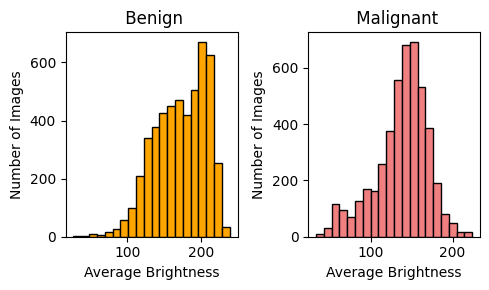

In [ ]:
def plot_brightness_distribution_side_by_side(benign_dir, malignant_dir):
    brightness_values_benign = []
    brightness_values_malignant = []

    # Collect brightness values for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's RGB
                brightness = np.mean(image)  # Average pixel intensity
                brightness_values_benign.append(brightness)

    # Collect brightness values for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's RGB
                brightness = np.mean(image)  # Average pixel intensity
                brightness_values_malignant.append(brightness)

    # Print brightness statistics
    print("Benign Brightness - Min:", np.min(brightness_values_benign),
          "Max:", np.max(brightness_values_benign),
          "Mean:", np.mean(brightness_values_benign))

    print("Malignant Brightness - Min:", np.min(brightness_values_malignant),
          "Max:", np.max(brightness_values_malignant),
          "Mean:", np.mean(brightness_values_malignant))

    # Set up the side-by-side plots
    plt.figure(figsize=(5, 3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.hist(brightness_values_benign, bins=20, color='orange', edgecolor='black')
    plt.title(' Benign')
    plt.xlabel('Average Brightness')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.hist(brightness_values_malignant, bins=20, color='lightcoral', edgecolor='black')
    plt.title(' Malignant')
    plt.xlabel('Average Brightness')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot brightness distribution for benign and malignant images side by side
plot_brightness_distribution_side_by_side(benign_dir, malignant_dir)

#Summary :

Key Findings:

Benign images are generally brighter (Mean: 172.52) than malignant images (Mean: 130.06).
The range of brightness is wider for benign images, indicating more variability.

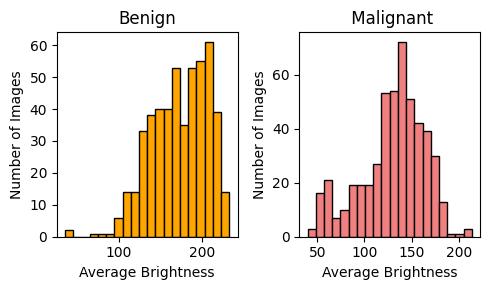

In [ ]:
def plot_brightness_distribution_side_by_side(benign_dir, malignant_dir):
    brightness_values_benign = []
    brightness_values_malignant = []

    # Collect brightness values for benign images
    for filename in os.listdir(benign_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(benign_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's RGB
                brightness = np.mean(image)  # Average pixel intensity
                brightness_values_benign.append(brightness)

    # Collect brightness values for malignant images
    for filename in os.listdir(malignant_dir):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(malignant_dir, filename)
            image = mpimg.imread(filepath)

            if len(image.shape) == 3:  # Ensure it's RGB
                brightness = np.mean(image)  # Average pixel intensity
                brightness_values_malignant.append(brightness)

    # Set up the side-by-side plots
    plt.figure(figsize=(5,3))

    # Plot for benign images
    plt.subplot(1, 2, 1)
    plt.hist(brightness_values_benign, bins=20, color='orange', edgecolor='black')
    plt.title('Benign')
    plt.xlabel('Average Brightness')
    plt.ylabel('Number of Images')

    # Plot for malignant images
    plt.subplot(1, 2, 2)
    plt.hist(brightness_values_malignant, bins=20, color='lightcoral', edgecolor='black')
    plt.title(' Malignant')
    plt.xlabel('Average Brightness')
    plt.ylabel('Number of Images')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Plot brightness distribution for benign and malignant images side by side
plot_brightness_distribution_side_by_side(benign_dir, malignant_dir)

# Image Orientation Analysis (Portrait vs Landscape)

Analyzing image orientation (portrait vs landscape) can reveal if the dataset has significant differences in how images are captured, which might affect model input requirements.

<ipython-input-18-82ed13cc6615>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


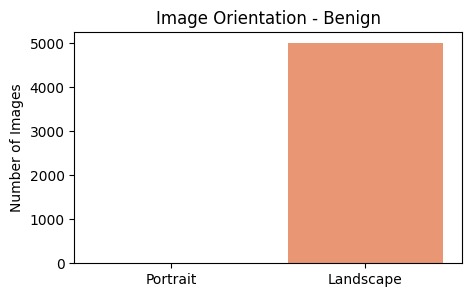

<ipython-input-18-82ed13cc6615>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


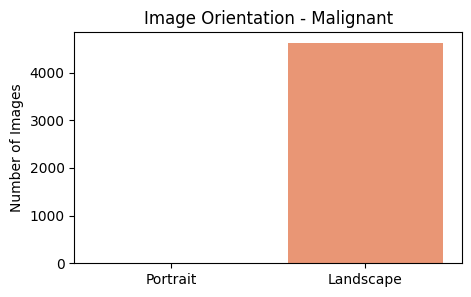

In [ ]:
def analyze_image_orientation(directory, label):
    portrait_count = 0
    landscape_count = 0

    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]

            if height > width:
                portrait_count += 1
            else:
                landscape_count += 1

    labels = ['Portrait', 'Landscape']
    counts = [portrait_count, landscape_count]

    plt.figure(figsize=(5,3))
    sns.barplot(x=labels, y=counts, palette="Set2")
    plt.title(f'Image Orientation - {label}')
    plt.ylabel('Number of Images')
    plt.show()

# Analyze image orientation for benign and malignant images
analyze_image_orientation(benign_dir, 'Benign')
analyze_image_orientation(malignant_dir, 'Malignant')


###key findings:
**All images are in landscape**

### Analyzing image orientation (portrait vs landscape) can reveal if the dataset has significant differences in how images are captured, which might affect model input requirements.

<ipython-input-21-82ed13cc6615>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


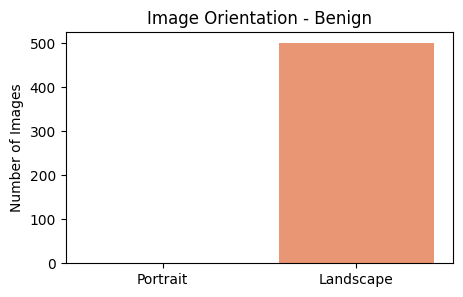

<ipython-input-21-82ed13cc6615>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=counts, palette="Set2")


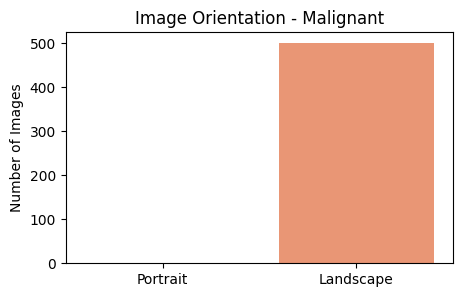

In [ ]:
def analyze_image_orientation(directory, label):
    portrait_count = 0
    landscape_count = 0

    for filename in os.listdir(directory):
        if filename.endswith(('.jpg', '.png')):
            filepath = os.path.join(directory, filename)
            image = mpimg.imread(filepath)
            height, width = image.shape[:2]

            if height > width:
                portrait_count += 1
            else:
                landscape_count += 1

    labels = ['Portrait', 'Landscape']
    counts = [portrait_count, landscape_count]

    plt.figure(figsize=(5,3))
    sns.barplot(x=labels, y=counts, palette="Set2")
    plt.title(f'Image Orientation - {label}')
    plt.ylabel('Number of Images')
    plt.show()

# Analyze image orientation for benign and malignant images
analyze_image_orientation(benign_dir, 'Benign')
analyze_image_orientation(malignant_dir, 'Malignant')

### Analyzing Image Sizes and Shapes in train Directory

In [ ]:
def analyze_image_sizes(directory):
  """Analyzes the sizes and shapes of images in a directory."""

  sizes = []
  shapes = []

  for filename in os.listdir(directory):
    if filename.endswith(('.jpg', '.png')):
      filepath = os.path.join(directory, filename)
      image = mpimg.imread(filepath)
      sizes.append(os.path.getsize(filepath))
      shapes.append(image.shape)

  print(f"Image size statistics for {directory}:")
  print(f"  Min size: {np.min(sizes)} bytes")
  print(f"  Max size: {np.max(sizes)} bytes")
  print(f"  Average size: {np.mean(sizes)} bytes")
  print(f"  Unique shapes: {set(shapes)}")

# Analyze image sizes in benign and malignant directories
analyze_image_sizes(benign_dir)
analyze_image_sizes(malignant_dir)

Image size statistics for /content/drive/MyDrive/train/benign:
  Min size: 4076 bytes
  Max size: 31258 bytes
  Average size: 9463.8284 bytes
  Unique shapes: {(300, 300, 3)}
Image size statistics for /content/drive/MyDrive/train/malignant:
  Min size: 4702 bytes
  Max size: 28775 bytes
  Average size: 10048.034460338102 bytes
  Unique shapes: {(300, 300, 3)}


### Displaying Random Images from train Directory


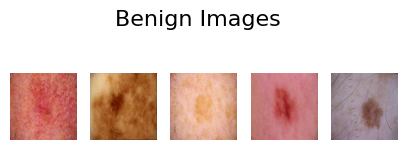

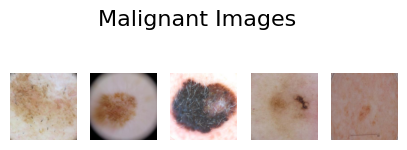

In [ ]:
def display_random_images(directory, title, num_images=5):
  """Displays a specified number of random images from a directory."""

  image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))]
  random_images = random.sample(image_files, num_images)

  plt.figure(figsize=(5,2))
  plt.suptitle(title, fontsize=16)

  for i, image_file in enumerate(random_images):
    image_path = os.path.join(directory, image_file)
    image = mpimg.imread(image_path)

    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')

  plt.show()

# Display random images from benign and malignant directories
display_random_images(benign_dir, 'Benign Images')
display_random_images(malignant_dir, 'Malignant Images')

# **Displaying Random Images from test Directory**

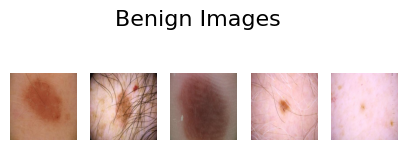

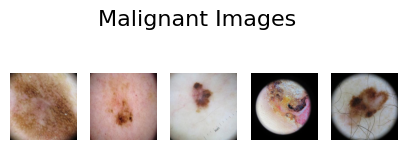

In [ ]:
def display_random_images(directory, title, num_images=5):
  """Displays a specified number of random images from a directory."""

  image_files = [f for f in os.listdir(directory) if f.endswith(('.jpg', '.png'))]
  random_images = random.sample(image_files, num_images)

  plt.figure(figsize=(5,2))
  plt.suptitle(title, fontsize=16)

  for i, image_file in enumerate(random_images):
    image_path = os.path.join(directory, image_file)
    image = mpimg.imread(image_path)

    plt.subplot(1, num_images, i + 1)
    plt.imshow(image)
    plt.axis('off')

  plt.show()

# Display random images from benign and malignant directories
display_random_images(benign_dir, 'Benign Images')
display_random_images(malignant_dir, 'Malignant Images')

# **Label Consistency and Quality**

**Verify that each image has an accurate label and that there are no duplicate or mislabeled entries.**


In [ ]:
def find_duplicates(image_dir):

    image_hashes = {}  # Store image hashes
    duplicates = []     # Store duplicate image paths

    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(image_dir, filename)
            try:
                with Image.open(img_path) as img:
                    hash = imagehash.phash(img)
                    if hash in image_hashes:
                        duplicates.append((image_hashes[hash], img_path))
                    else:
                        image_hashes[hash] = img_path
            except Exception as e:
                print(f"Error processing image: {img_path}, error: {e}")


    '''if duplicates:
        print(f"Duplicates found in {image_dir}:")
        for original, duplicate in duplicates:
            print(f"Original: {original}")
            print(f"Duplicate: {duplicate}")
    else:
        print(f"No duplicates found in {image_dir}")'''

    return duplicates

datasets = [
    (os.path.join(train_dir, 'benign'), "train_benign"),
    (os.path.join(train_dir, 'malignant'), "train_malignant"),
    (os.path.join(test_dir, 'benign'), "test_benign"),
    (os.path.join(test_dir, 'malignant'), "test_malignant")
]

for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)
    duplicate_count = len(duplicates)
    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")

Number of duplicate images in train_benign: 8
Number of duplicate images in train_malignant: 18
Number of duplicate images in test_benign: 1
Number of duplicate images in test_malignant: 0


# **Creating dataset without duplicate images**

In [ ]:
def move_non_duplicates(image_dir, duplicates, new_dir):
    # Ensure the new directory exists
    os.makedirs(new_dir, exist_ok=True)

    # Create a set of duplicate image names for quick lookup
    duplicate_images = {duplicate[1] for duplicate in duplicates}

    # Copy non-duplicate images to the new directory
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')) and filename not in duplicate_images:
            original_path = os.path.join(image_dir, filename)
            new_path = os.path.join(new_dir, filename)
            shutil.copy(original_path, new_path)

# Define paths for train and test directories

new_base_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset'

# Define datasets for different categories in train and test
datasets = [
    (os.path.join(train_dir, 'benign'), os.path.join(new_base_dir, 'train', 'benign')),
    (os.path.join(train_dir, 'malignant'), os.path.join(new_base_dir, 'train', 'malignant')),
    (os.path.join(test_dir, 'benign'), os.path.join(new_base_dir, 'test', 'benign')),
    (os.path.join(test_dir, 'malignant'), os.path.join(new_base_dir, 'test', 'malignant'))
]

# Process each dataset
for original_path, new_path in datasets:
    duplicates = find_duplicates(original_path)
    move_non_duplicates(original_path, duplicates, new_path)

# Final success message
print("Successfully created new directory structure without duplicates.")


Successfully created new directory structure without duplicates.


# **Checking for duplicate images**

In [ ]:
image_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset'
train_dir='/content/drive/MyDrive/melanomaAI/without_duplicate_dataset/train'
test_dir='/content/drive/MyDrive/melanomaAI/without_duplicate_dataset/test'
def find_duplicates(image_dir):

    image_hashes = {}  # Store image hashes
    duplicates = []     # Store duplicate image paths

    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            img_path = os.path.join(image_dir, filename)
            try:
                with Image.open(img_path) as img:
                    hash = imagehash.phash(img)
                    if hash in image_hashes:
                        duplicates.append((image_hashes[hash], img_path))
                    else:
                        image_hashes[hash] = img_path
            except Exception as e:
                print(f"Error processing image: {img_path}, error: {e}")


    return duplicates

datasets = [
    (os.path.join(train_dir, 'benign'), "train_benign"),
    (os.path.join(train_dir, 'malignant'), "train_malignant"),
    (os.path.join(test_dir, 'benign'), "test_benign"),
    (os.path.join(test_dir, 'malignant'), "test_malignant")
]

for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)
    duplicate_count = len(duplicates)
    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")

Number of duplicate images in train_benign: 0
Number of duplicate images in train_malignant: 0
Number of duplicate images in test_benign: 0
Number of duplicate images in test_malignant: 0


In [ ]:

# Check for duplicates in each dataset
for dataset_path, dataset_name in datasets:
    duplicates = find_duplicates(dataset_path)
    duplicate_count = len(duplicates)

    print(f"Number of duplicate images in {dataset_name}: {duplicate_count}")
    if duplicate_count > 0:
        print(f"Duplicates found in {dataset_name}:")
        for original, duplicate in duplicates:
            print(f"Original: {os.path.basename(original)}, Duplicate: {os.path.basename(duplicate)}")
    else:
        print(f"No duplicates found in {dataset_name}")
    print("\n")

Number of duplicate images in train_benign: 0
No duplicates found in train_benign


Number of duplicate images in train_malignant: 0
No duplicates found in train_malignant


Number of duplicate images in test_benign: 0
No duplicates found in test_benign


Number of duplicate images in test_malignant: 0
No duplicates found in test_malignant




**There is no duplicate images in datset**

# **Load Sample Images from Each Class**

In [ ]:
new_base_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset'
# Load sample images from each category and dataset type
def load_sample_images(data_type, category, num_images=2):
    images = []
    sample_dir = os.path.join(new_base_dir, data_type, category)
    image_files = os.listdir(sample_dir)[:num_images]

    for image_file in image_files:
        image_path = os.path.join(sample_dir, image_file)
        image = cv2.imread(image_path)
        images.append((image, image_file))

    return images

# Load sample images for each category and dataset
train_benign_samples = load_sample_images('train', 'benign')
train_malignant_samples = load_sample_images('train', 'malignant')
test_benign_samples = load_sample_images('test', 'benign')
test_malignant_samples = load_sample_images('test', 'malignant')


# **Sample images**

Original Train Benign Samples:


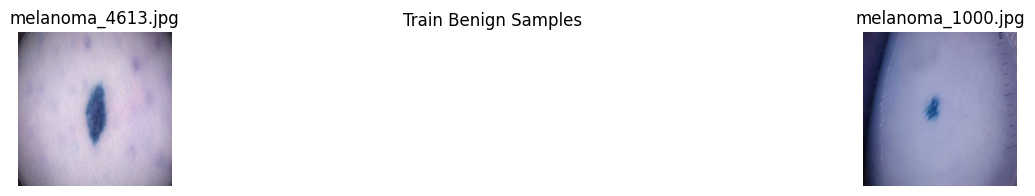


Original Train Malignant Samples:


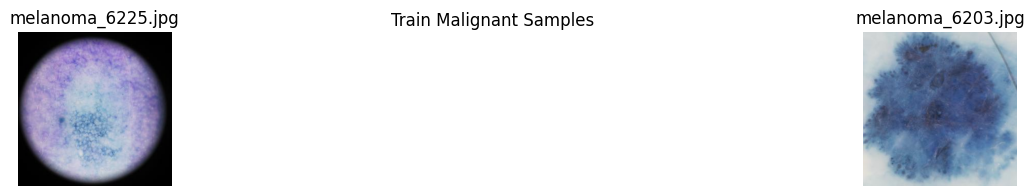


Original Test Benign Samples:


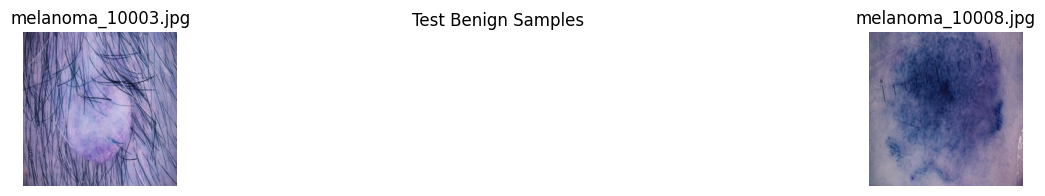


Original Test Malignant Samples:


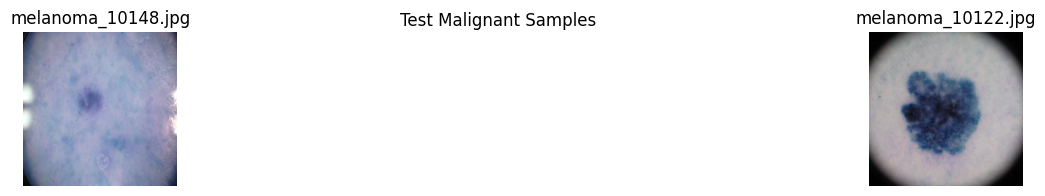

In [ ]:
# Function to display images
def display_images(images, title):
    plt.figure(figsize=(20, 2))
    plt.suptitle(title)
    for i, (img, name) in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(name)
        plt.axis('off')
    plt.show()

# Step 3: Display Original Sample Images with Labels
print("Original Train Benign Samples:")
display_images(train_benign_samples, "Train Benign Samples")

print("\nOriginal Train Malignant Samples:")
display_images(train_malignant_samples, "Train Malignant Samples")

print("\nOriginal Test Benign Samples:")
display_images(test_benign_samples, "Test Benign Samples")

print("\nOriginal Test Malignant Samples:")
display_images(test_malignant_samples, "Test Malignant Samples")


# **Noise Reduction**

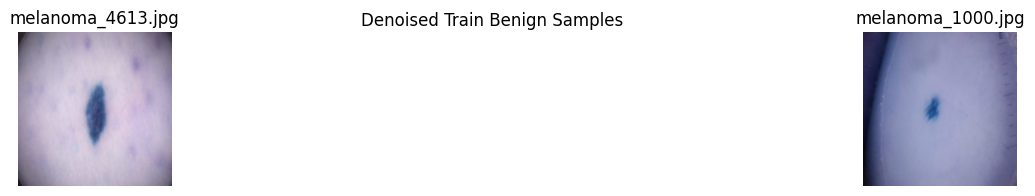

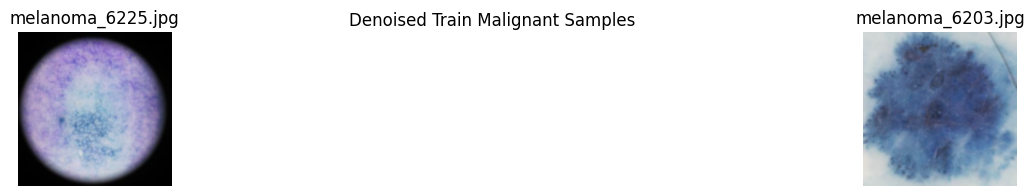

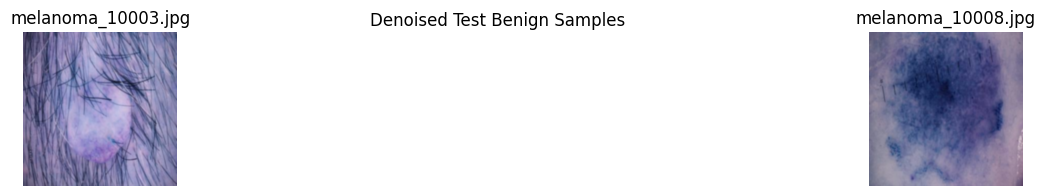

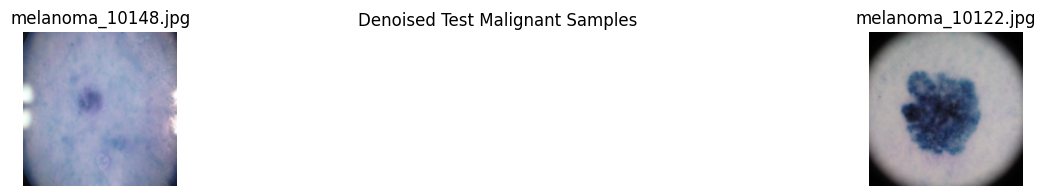

In [ ]:
# Apply Gaussian blur for noise reduction
def noise_reduction(images):
    processed_images = []
    for image, name in images:
        denoised_image = cv2.GaussianBlur(image, (5, 5), 0)
        processed_images.append((denoised_image, name))
    return processed_images

# Noise reduction on train and test samples
train_benign_denoised = noise_reduction(train_benign_samples)
train_malignant_denoised = noise_reduction(train_malignant_samples)
test_benign_denoised = noise_reduction(test_benign_samples)
test_malignant_denoised = noise_reduction(test_malignant_samples)

# Display denoised images for train and test sets
display_images(train_benign_denoised, "Denoised Train Benign Samples")
display_images(train_malignant_denoised, "Denoised Train Malignant Samples")
display_images(test_benign_denoised, "Denoised Test Benign Samples")
display_images(test_malignant_denoised, "Denoised Test Malignant Samples")


# **Normalization**


Normalized Train Benign Samples:


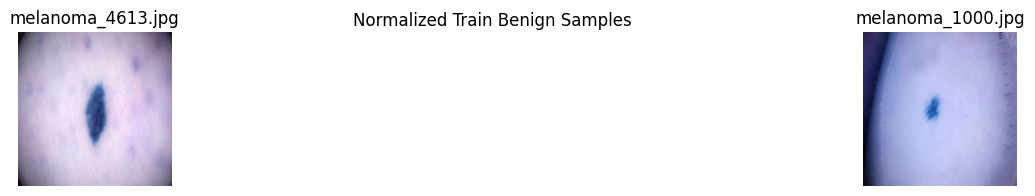


Normalized Train Malignant Samples:


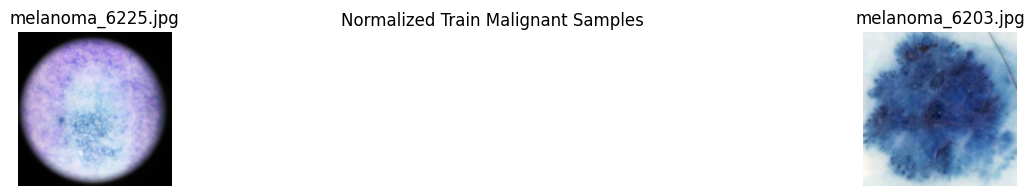


Normalized Test Benign Samples:


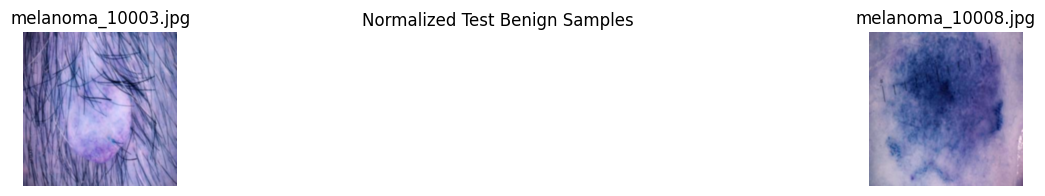


Normalized Test Malignant Samples:


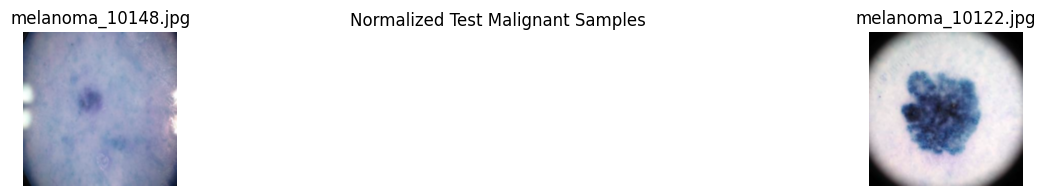

In [ ]:
# Function to normalize images to [0, 255]
def normalize_images_to_255(images):
    normalized_images = []
    for img, name in images:
        norm_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        normalized_images.append((norm_img, name))
    return normalized_images

# Step 5: Apply Normalization with Labels
train_benign_normalized = normalize_images_to_255(train_benign_denoised)
train_malignant_normalized = normalize_images_to_255(train_malignant_denoised)
test_benign_normalized = normalize_images_to_255(test_benign_denoised)
test_malignant_normalized = normalize_images_to_255(test_malignant_denoised)

print("\nNormalized Train Benign Samples:")
display_images(train_benign_normalized, "Normalized Train Benign Samples")

print("\nNormalized Train Malignant Samples:")
display_images(train_malignant_normalized, "Normalized Train Malignant Samples")

print("\nNormalized Test Benign Samples:")
display_images(test_benign_normalized, "Normalized Test Benign Samples")

print("\nNormalized Test Malignant Samples:")
display_images(test_malignant_normalized, "Normalized Test Malignant Samples")


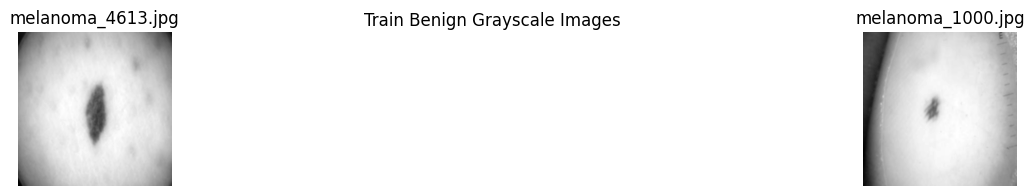

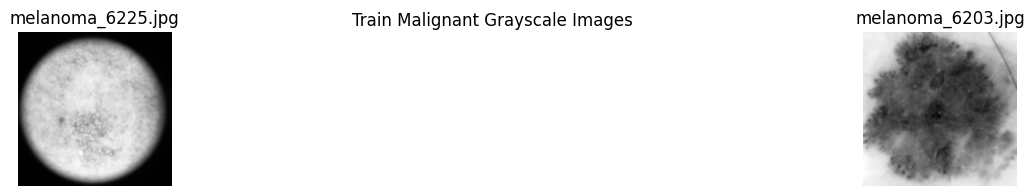

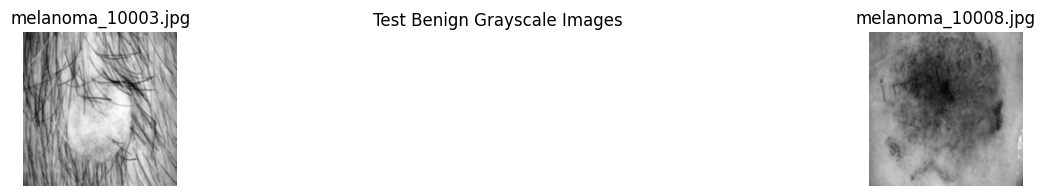

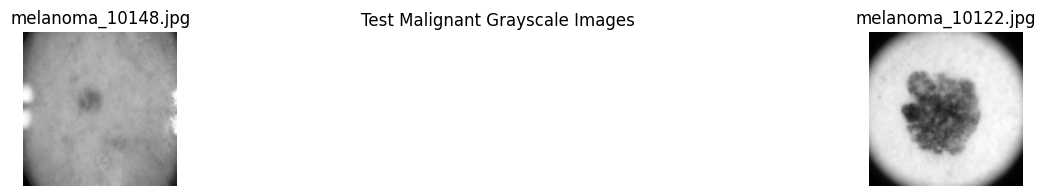

In [ ]:
# Function to convert an image to grayscale
def to_grayscale(image):
    # Check if the image is RGB and convert by averaging the channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        return np.mean(image, axis=2)  # Convert RGB to grayscale by averaging
    return image  # If already grayscale, return as is

# Function to apply grayscale conversion to a list of processed images
def apply_grayscale(images, title_prefix):
    grayscale_images = []
    for img, name in images:
        # Convert image to grayscale
        grayscale_img = to_grayscale(img)
        grayscale_images.append((grayscale_img, name))
    display_images(grayscale_images, f"{title_prefix} Grayscale Images")

# Function to display images in a grid format
def display_images(images, title):
    plt.figure(figsize=(20, 2))
    plt.suptitle(title)
    for i, (img, name) in enumerate(images):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap='gray' if img.ndim == 2 else None)
        plt.title(name)
        plt.axis('off')
    plt.show()

# Assuming `train_benign_normalized`, `train_malignant_normalized`, etc., are the lists of processed images
# Apply grayscale conversion and display images
apply_grayscale(train_benign_normalized, "Train Benign")
apply_grayscale(train_malignant_normalized, "Train Malignant")
apply_grayscale(test_benign_normalized, "Test Benign")
apply_grayscale(test_malignant_normalized, "Test Malignant")

# **Creating dataset by converting into greyscale**

In [ ]:
def move_and_normalize_images(image_dir, duplicates, new_dir):
    # Ensure the new directory exists
    os.makedirs(new_dir, exist_ok=True)

    # Create a set of duplicate image names for quick lookup
    duplicate_images = {duplicate[1] for duplicate in duplicates}

    # Process and copy non-duplicate images to the new directory
    for filename in os.listdir(image_dir):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')) and filename not in duplicate_images:
            original_path = os.path.join(image_dir, filename)
            new_path = os.path.join(new_dir, filename)

            # Open, convert to grayscale, normalize, and save to new location
            with Image.open(original_path) as img:
                grayscale_img = ImageOps.grayscale(img)  # Convert to grayscale
                normalized_img = ImageOps.autocontrast(grayscale_img)  # Normalize
                normalized_img.save(new_path)  # Save to the new directory

# Define paths for train and test directories
new_base_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory'

# Define datasets for different categories in train and test
datasets = [
    (os.path.join(train_dir, 'benign'), os.path.join(new_base_dir, 'train', 'benign')),
    (os.path.join(train_dir, 'malignant'), os.path.join(new_base_dir, 'train', 'malignant')),
    (os.path.join(test_dir, 'benign'), os.path.join(new_base_dir, 'test', 'benign')),
    (os.path.join(test_dir, 'malignant'), os.path.join(new_base_dir, 'test', 'malignant'))
]

# Process each dataset
for original_path, new_path in datasets:
    duplicates = find_duplicates(original_path)
    move_and_normalize_images(original_path, duplicates, new_path)

# Final success message
print("Successfully created new directory structure with normalized grayscale images without duplicates.")


Successfully created new directory structure with normalized grayscale images without duplicates.


# **Data Augmentation**

---



# **Augmentation in sample image**


Processing Train Benign Samples:


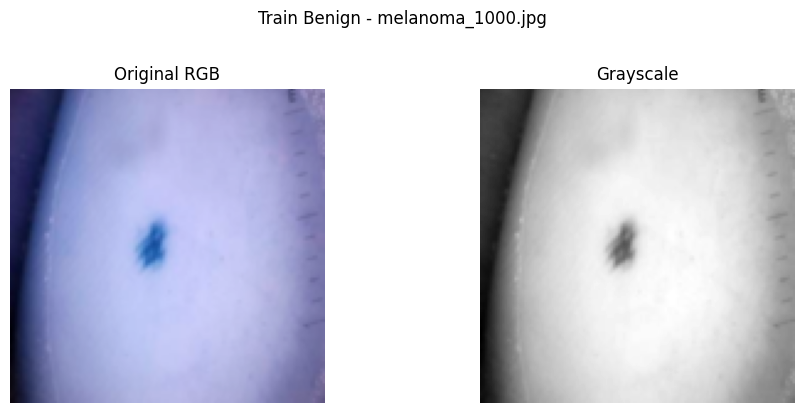

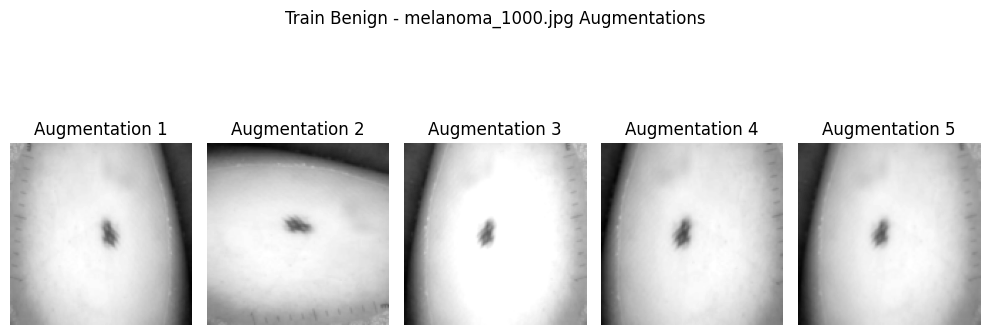

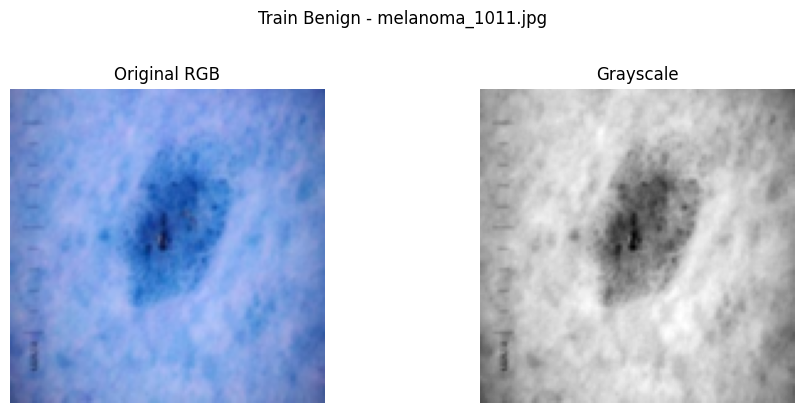

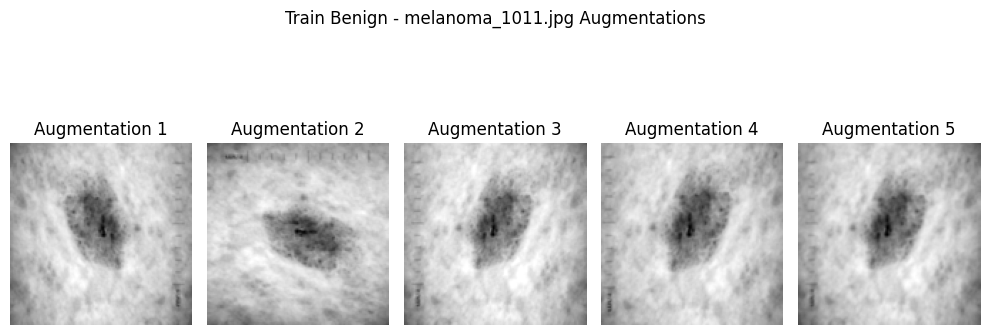


Processing Train Malignant Samples:


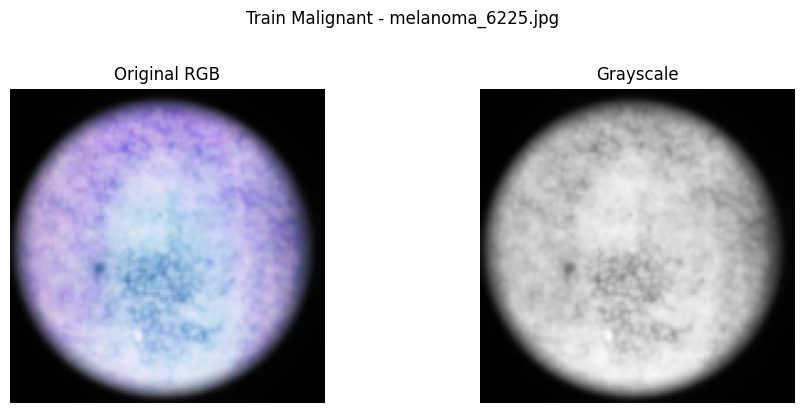

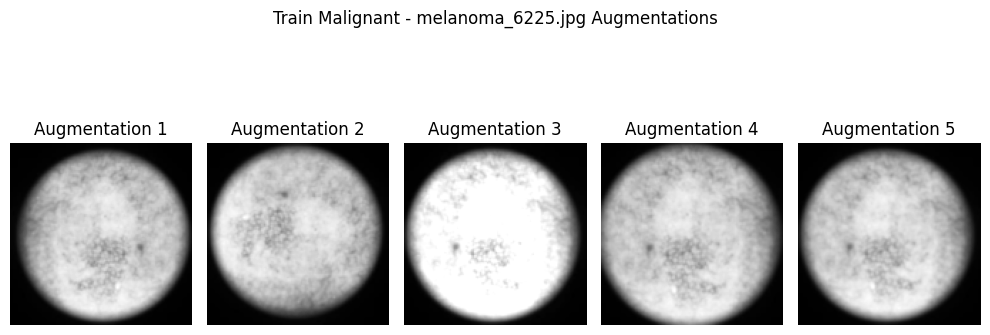

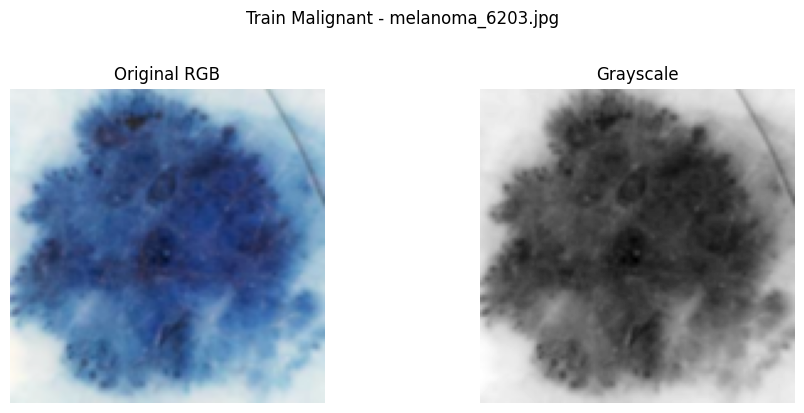

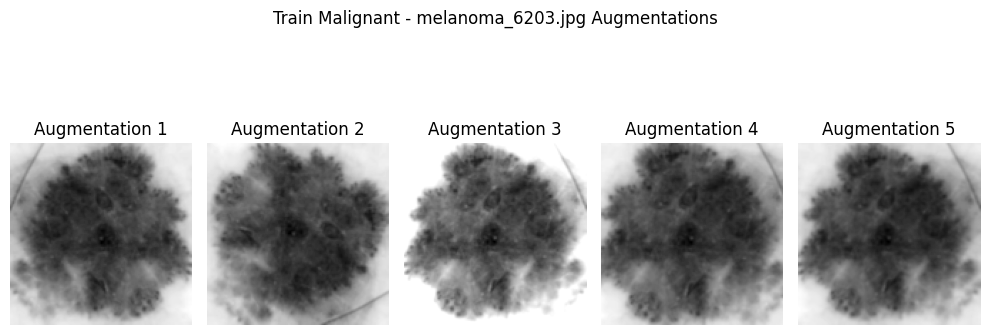


Processing Test Benign Samples:


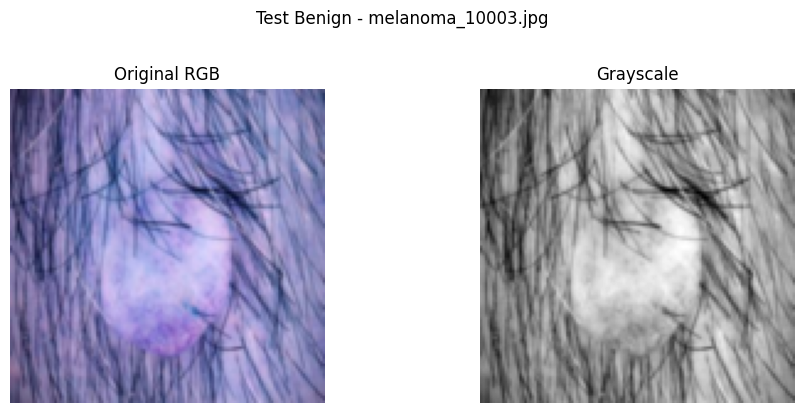

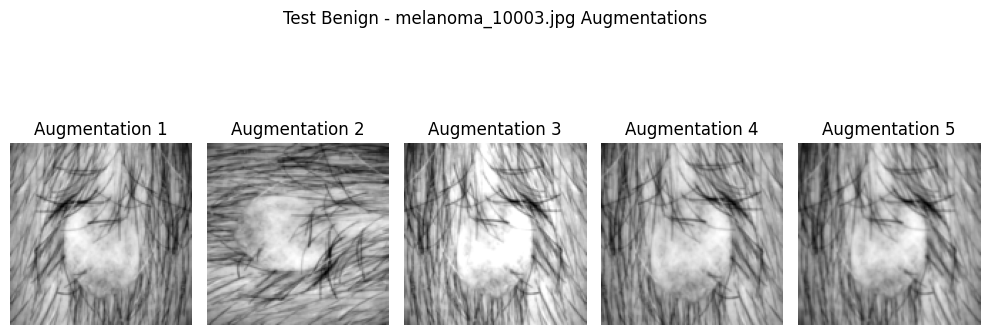

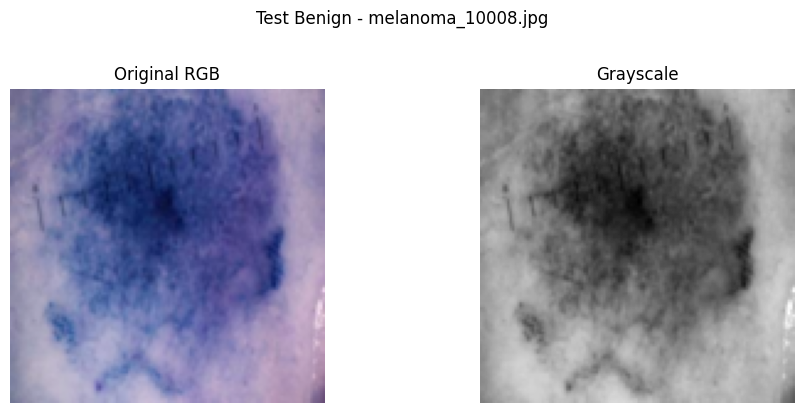

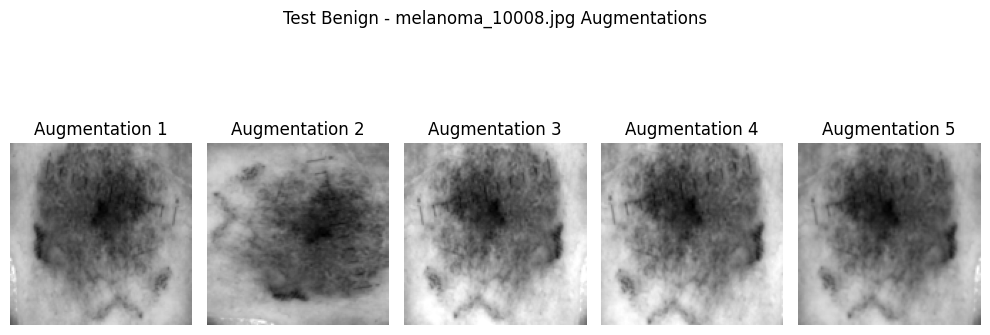


Processing Test Malignant Samples:


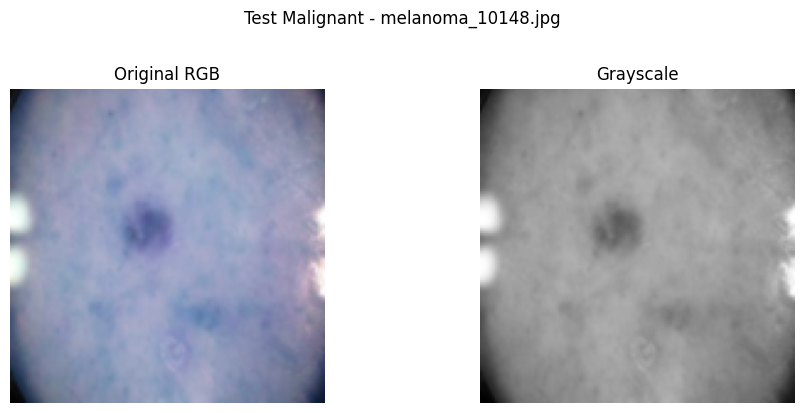

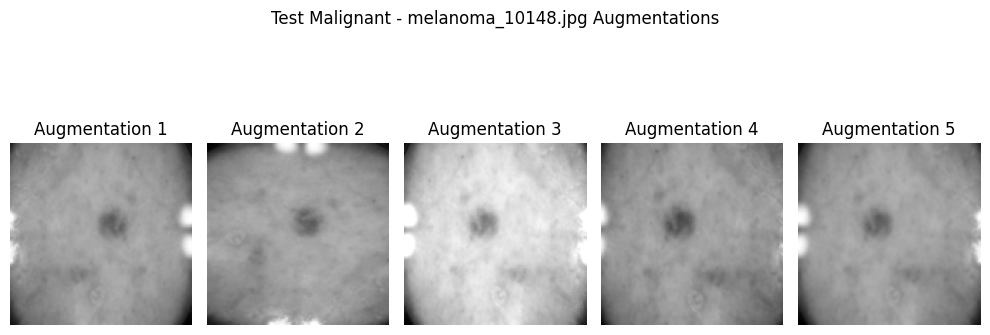

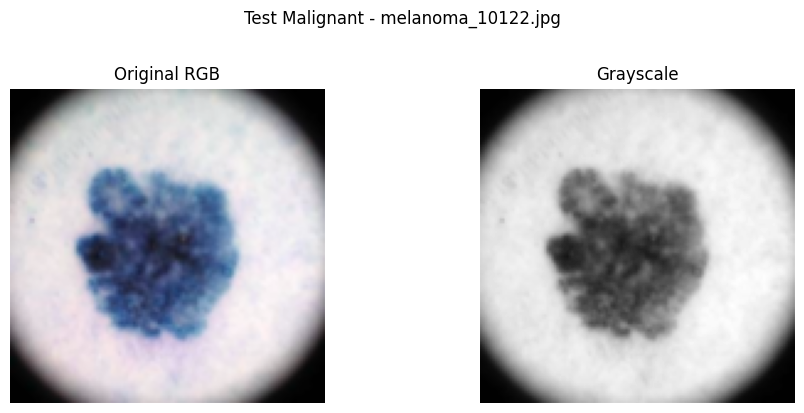

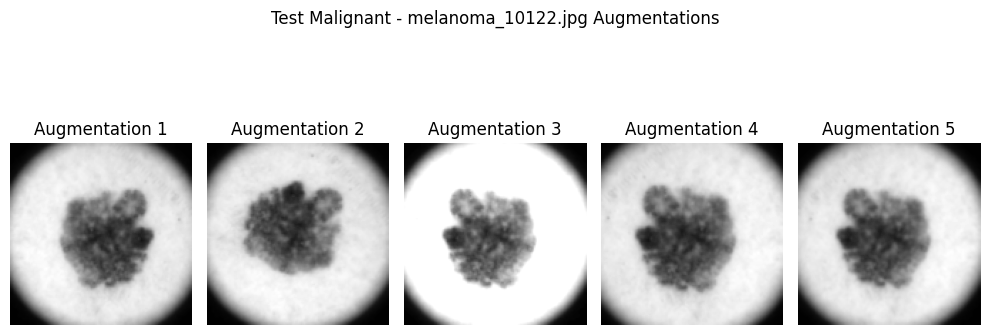

In [ ]:
# Function to normalize images to [0, 255]
def normalize_images_to_255(images):
    normalized_images = []
    for img, name in images:
        norm_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
        normalized_images.append((norm_img, name))
    return normalized_images

# Function to convert an image to grayscale
def to_grayscale(image):
    # Check if the image is RGB and convert by averaging the channels
    if len(image.shape) == 3 and image.shape[2] == 3:
        return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image  # If already grayscale, return as is

# Function to apply advanced augmentations on grayscale images
def augment_images(image):
    aug_images = []
    # Example augmentations on grayscale images
    aug_images.append(cv2.flip(image, 1))  # Horizontal flip
    aug_images.append(cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE))  # Rotate 90 degrees
    aug_images.append(cv2.convertScaleAbs(image, alpha=1.2, beta=30))  # Increase brightness
    zoomed = cv2.resize(image[10:-10, 10:-10], (image.shape[1], image.shape[0]))  # Simple zoom effect
    aug_images.append(zoomed)
    aug_images.append(cv2.GaussianBlur(image, (5, 5), 0))  # Blur
    return aug_images

# Function to resize images to a fixed size
def resize_image(image, size=(128, 128)):
    return cv2.resize(image, size, interpolation=cv2.INTER_AREA)

# Function to display images in a grid format with consistent size
def display_images(images, title):
    plt.figure(figsize=(10, 4))
    plt.suptitle(title, fontsize=12, y=1.02)

    # Define grid size based on number of images
    grid_cols = len(images)
    for i, (img, name) in enumerate(images):
        plt.subplot(1, grid_cols, i + 1)

        # Resize image to a fixed size and display
        resized_img = resize_image(img)
        plt.imshow(resized_img, cmap='gray')
        plt.title(name, fontsize=12)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Apply normalization and display all outputs as per the user's requirements
def process_and_display(images, class_name):
    normalized_images = normalize_images_to_255(images)

    for img, name in normalized_images:
        # Original Image and Grayscale
        grayscale_img = to_grayscale(img)
        display_images([(resize_image(img), "Original RGB"),
                        (resize_image(grayscale_img), "Grayscale")],
                       f"{class_name} - {name}")

        # Augmented Images (on grayscale)
        augmented_imgs = augment_images(grayscale_img)
        augmented_display_images = [(resize_image(aug_img), f"Augmentation {i+1}")
                                    for i, aug_img in enumerate(augmented_imgs)]
        display_images(augmented_display_images, f"{class_name} - {name} Augmentations")

# Assuming `train_benign_denoised`, `train_malignant_denoised`, etc., are the lists of original images
# Process and display images for each class
print("\nProcessing Train Benign Samples:")
process_and_display(train_benign_denoised, "Train Benign")

print("\nProcessing Train Malignant Samples:")
process_and_display(train_malignant_denoised, "Train Malignant")

print("\nProcessing Test Benign Samples:")
process_and_display(test_benign_denoised, "Test Benign")

print("\nProcessing Test Malignant Samples:")
process_and_display(test_malignant_denoised, "Test Malignant")


# **Applying preprocessing steps to all images**






# **1.Malignant**



In [ ]:
# Define your augmentations
def apply_augmentation(image):
    # Initialize ImageDataGenerator for augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,          # Random rotation
        width_shift_range=0.2,      # Random horizontal shift
        height_shift_range=0.2,     # Random vertical shift
        shear_range=0.2,            # Shear transformation
        zoom_range=0.2              # Random zoom
    )

    # Convert image to a 4D tensor (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Use the generator to produce augmented images
    augmented_images = []
    for _ in range(5):  # Generate 5 augmentations per image
        augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Get augmented image
        augmented_images.append(augmented_image.astype(np.uint8))  # Convert back to uint8

    return augmented_images

# Function to apply augmentations to all images in the train directory
def augment_images_in_train_directory(input_dir, output_dir):
    # Set the path for the train directory
    train_dir = os.path.join(input_dir, 'train')

    if not os.path.exists(train_dir):
        print(f"Train directory {train_dir} does not exist.")
        return

    # Iterate over the classes: malignant
    for class_name in ['malignant']:
        class_dir = os.path.join(train_dir, class_name)

        # Create a folder for augmented images for each class
        augmented_class_path = os.path.join(output_dir, 'train', class_name)
        os.makedirs(augmented_class_path, exist_ok=True)

        # Iterate through all images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # Apply augmentations and save multiple augmented images
            augmented_images = apply_augmentation(image)
            for i, augmented_image in enumerate(augmented_images):
                # Save each augmented image
                augmented_image_name = f"aug_{i+1}_{image_name}"
                augmented_image_path = os.path.join(augmented_class_path, augmented_image_name)
                cv2.imwrite(augmented_image_path, augmented_image)

    print(f"Augmentation completed successfully for class '{class_name}'")

# Directories
input_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory'
output_dir = '/content/drive/MyDrive/melanomaAI/Augimages_dataset'

# Call the function to apply augmentations and save images in the train set
augment_images_in_train_directory(input_dir, output_dir)


Augmentation completed successfully for class 'malignant'


# **Counting Number Images In Malignant**

In [ ]:
def count_images(directory, valid_extensions=('.jpg', '.jpeg', '.png')):


    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count

# Define the directories for train and test sets
train_dir = '/content/drive/MyDrive/melanomaAI/Augimages_dataset/train'

# Define the malignant directories within train and test directories
malignant_train_dir = os.path.join(train_dir, 'malignant')


# Count only malignant images in train and test sets
num_malignant_train = count_images(malignant_train_dir)


# Print the count of malignant images
print('Number of malignant images in train:', num_malignant_train)


Number of malignant images in train: 22935


# **2.Benign**

In [ ]:
# Define your augmentations
def apply_augmentation(image):
    # Initialize ImageDataGenerator for augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,          # Random rotation
        width_shift_range=0.2,      # Random horizontal shift
        height_shift_range=0.2,     # Random vertical shift
        shear_range=0.2,            # Shear transformation
        zoom_range=0.2              # Random zoom
    )

    # Convert image to a 4D tensor (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Use the generator to produce augmented images
    augmented_images = []
    for _ in range(5):  # Generate 5 augmentations per image
        augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Get augmented image
        augmented_images.append(augmented_image.astype(np.uint8))  # Convert back to uint8

    return augmented_images

# Function to apply augmentations to all images in the train directory
def augment_images_in_train_directory(input_dir, output_dir):
    # Set the path for the train directory
    train_dir = os.path.join(input_dir, 'train')

    if not os.path.exists(train_dir):
        print(f"Train directory {test_dir} does not exist.")
        return

    # Iterate over the classes: malignant
    for class_name in ['benign']:
        class_dir = os.path.join(train_dir, class_name)

        # Create a folder for augmented images for each class
        augmented_class_path = os.path.join(output_dir, 'train', class_name)
        os.makedirs(augmented_class_path, exist_ok=True)

        # Iterate through all images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # Apply augmentations and save multiple augmented images
            augmented_images = apply_augmentation(image)
            for i, augmented_image in enumerate(augmented_images):
                # Save each augmented image
                augmented_image_name = f"aug_{i+1}_{image_name}"
                augmented_image_path = os.path.join(augmented_class_path, augmented_image_name)
                cv2.imwrite(augmented_image_path, augmented_image)

    print(f"Augmentation completed successfully for class '{class_name}'")

# Directories
input_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory'
output_dir = '/content/drive/MyDrive/melanomaAI/augmented_images'

# Call the function to apply augmentations and save images in the train set
augment_images_in_train_directory(input_dir, output_dir)


Augmentation completed successfully for class 'benign'


In [ ]:
import os

def count_images(directory, valid_extensions=('.jpg', '.jpeg', '.png')):

    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count

# Define the directories for train and test sets
train_dir = '/content/drive/MyDrive/melanomaAI/Augimages_dataset/train'

# Define the malignant directories within train and test directories
benign_train_dir = os.path.join(train_dir, 'benign')


# Count only malignant images in train and test sets
num_benign_train_dir= count_images(benign_train_dir)


# Print the count of malignant images
print('Number of malignant images in train:', num_benign_train_dir)



Number of malignant images in train: 24960


Total images in Augmented dataset is 24960+22935=47895

# **Applying preprocessing steps to all images without dulicate dataset**

In [ ]:
# Define your augmentations
def apply_augmentation(image):
    # Initialize ImageDataGenerator for augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,          # Random rotation
        width_shift_range=0.2,      # Random horizontal shift
        height_shift_range=0.2,     # Random vertical shift
        shear_range=0.2,            # Shear transformation
        zoom_range=0.2              # Random zoom
    )

    # Convert image to a 4D tensor (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Use the generator to produce augmented images
    augmented_images = []
    for _ in range(5):  # Generate 5 augmentations per image
        augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Get augmented image
        augmented_images.append(augmented_image.astype(np.uint8))  # Convert back to uint8

    return augmented_images

# Function to apply augmentations to all images in the train directory
def augment_images_in_train_directory(input_dir, output_dir):
    # Set the path for the train directory
    train_dir = os.path.join(input_dir, 'train')

    if not os.path.exists(train_dir):
        print(f"Train directory {train_dir} does not exist.")
        return

    # Iterate over the classes: malignant
    for class_name in ['malignant']:
        class_dir = os.path.join(train_dir, class_name)

        # Create a folder for augmented images for each class
        augmented_class_path = os.path.join(output_dir, 'train', class_name)
        os.makedirs(augmented_class_path, exist_ok=True)

        # Iterate through all images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # Apply augmentations and save multiple augmented images
            augmented_images = apply_augmentation(image)
            for i, augmented_image in enumerate(augmented_images):
                # Save each augmented image
                augmented_image_name = f"aug_{i+1}_{image_name}"
                augmented_image_path = os.path.join(augmented_class_path, augmented_image_name)
                cv2.imwrite(augmented_image_path, augmented_image)

    print(f"Augmentation completed successfully for class '{class_name}'")

# Directories
input_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset'
output_dir = '/content/drive/MyDrive/melanomaAI/Org_aug_dataset'

# Call the function to apply augmentations and save images in the train set
augment_images_in_train_directory(input_dir, output_dir)


Augmentation completed successfully for class 'malignant'


In [ ]:
def count_images(directory, valid_extensions=('.jpg', '.jpeg', '.png')):


    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count

# Define the directories for train and test sets
train_dir = '/content/drive/MyDrive/melanomaAI/Org_aug_dataset/train'

# Define the malignant directories within train and test directories
malignant_train_dir = os.path.join(train_dir, 'malignant')


# Count only malignant images in train and test sets
num_malignant_train = count_images(malignant_train_dir)


# Print the count of malignant images
print('Number of malignant images in train:', num_malignant_train)


Number of malignant images in train: 22935


In [ ]:
# Define your augmentations
def apply_augmentation(image):
    # Initialize ImageDataGenerator for augmentations
    datagen = ImageDataGenerator(
        rotation_range=20,          # Random rotation
        width_shift_range=0.2,      # Random horizontal shift
        height_shift_range=0.2,     # Random vertical shift
        shear_range=0.2,            # Shear transformation
        zoom_range=0.2              # Random zoom
    )

    # Convert image to a 4D tensor (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)

    # Use the generator to produce augmented images
    augmented_images = []
    for _ in range(5):  # Generate 5 augmentations per image
        augmented_image = next(datagen.flow(image, batch_size=1))[0]  # Get augmented image
        augmented_images.append(augmented_image.astype(np.uint8))  # Convert back to uint8

    return augmented_images

# Function to apply augmentations to all images in the train directory
def augment_images_in_train_directory(input_dir, output_dir):
    # Set the path for the train directory
    train_dir = os.path.join(input_dir, 'train')

    if not os.path.exists(train_dir):
        print(f"Train directory {train_dir} does not exist.")
        return

    # Iterate over the classes: malignant
    for class_name in ['benign']:
        class_dir = os.path.join(train_dir, class_name)

        # Create a folder for augmented images for each class
        augmented_class_path = os.path.join(output_dir, 'train', class_name)
        os.makedirs(augmented_class_path, exist_ok=True)

        # Iterate through all images in the class directory
        for image_name in os.listdir(class_dir):
            image_path = os.path.join(class_dir, image_name)

            # Load the image
            image = cv2.imread(image_path)
            if image is None:
                print(f"Warning: Could not read image {image_path}. Skipping.")
                continue

            # Apply augmentations and save multiple augmented images
            augmented_images = apply_augmentation(image)
            for i, augmented_image in enumerate(augmented_images):
                # Save each augmented image
                augmented_image_name = f"aug_{i+1}_{image_name}"
                augmented_image_path = os.path.join(augmented_class_path, augmented_image_name)
                cv2.imwrite(augmented_image_path, augmented_image)

    print(f"Augmentation completed successfully for class '{class_name}'")

# Directories
input_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset'
output_dir = '/content/drive/MyDrive/melanomaAI/O_aug_dataset'

# Call the function to apply augmentations and save images in the train set
augment_images_in_train_directory(input_dir, output_dir)


Augmentation completed successfully for class 'benign'


In [ ]:
def count_images(directory, valid_extensions=('.jpg', '.jpeg', '.png')):


    count = 0
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(valid_extensions):
                count += 1
    return count

# Define the directories for train and test sets
train_dir = '/content/drive/MyDrive/melanomaAI/O_aug_dataset/train'

# Define the malignant directories within train and test directories
benign_train_dir = os.path.join(train_dir, 'benign')


# Count only malignant images in train and test sets
num_benign_train = count_images(benign_train_dir)


# Print the count of malignant images
print('Number of benign images in train:', num_benign_train)


Number of benign images in train: 24960


# **MODEL**


#1. **CNN Model for without duplicate dataset**



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **CNN for Original Melanoma Dataset**
This section implements a CNN model for the original melanoma dataset. It includes:
- Loading and preprocessing the training and test datasets.
- Defining an advanced CNN architecture with regularization techniques.
- Compiling the model for binary classification using sparse categorical crossentropy.


**Model 1.1**

Found 9579 files belonging to 2 classes.
Found 999 files belonging to 2 classes.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_20          │ (None, 98, 98, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 47, 47, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 21, 21, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 512)            │     6,554,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,651,330 (25.37 MB)

 Trainable params: 6,649,858 (25.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 175s 570ms/step - accuracy: 0.7990 - loss: 0.6059 - val_accuracy: 0.7067 - val_loss: 0.5604
Epoch 2/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 172s 572ms/step - accuracy: 0.8484 - loss: 0.4247 - val_accuracy: 0.7938 - val_loss: 0.4444
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 170s 568ms/step - accuracy: 0.8591 - loss: 0.3744 - val_accuracy: 0.7798 - val_loss: 0.4890
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 178s 593ms/step - accuracy: 0.8635 - loss: 0.3558 - val_accuracy: 0.7718 - val_loss: 0.6625
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 205s 683ms/step - accuracy: 0.8770 - loss: 0.3203 - val_accuracy: 0.7177 - val_loss: 0.8059
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 211s 703ms/step - accuracy: 0.8797 - loss: 0.3036 - val_accuracy: 0.7808 - val_loss: 0.8304
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 211s 702ms/step - accuracy: 0.8814 - loss: 0.2955 - val_accuracy: 0.7748 - val_loss: 0.9767
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.8818 - loss: 0.2593
T

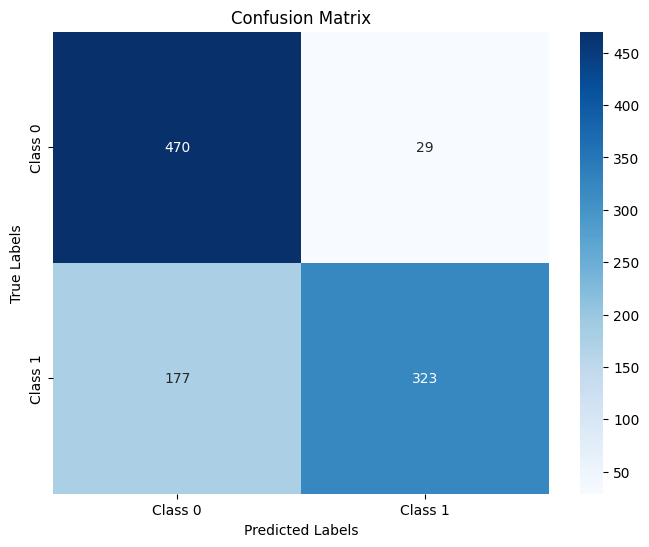

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.73      0.94      0.82       499
     Class 1       0.92      0.65      0.76       500

    accuracy                           0.79       999
   macro avg       0.82      0.79      0.79       999
weighted avg       0.82      0.79      0.79       999



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Define paths to your dataset
train_dir = '/kaggle/input/withoutdup-dataset/without_duplicate_dataset/train'
test_dir = '/kaggle/input/withoutdup-dataset/without_duplicate_dataset/test'

# Define the input image size and batch size
image_size = (100, 100)
batch_size = 32  # Use a reasonable batch size for better performance

# Load and preprocess the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',
    shuffle=False
)

# Normalize the pixel values
normalization_layer = layers.Rescaling(1. / 255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Define the advanced CNN model
def create_advanced_cnn(input_shape, num_classes):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.3),

        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.4),

        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(0.5),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),

        layers.Dense(num_classes, activation='softmax')  # For binary classification, use 'softmax'
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Define input shape and number of classes
input_shape = (100, 100, 3)  # Adjust based on your image dimensions
num_classes = 2  # Binary classification

# Create the model
model = create_advanced_cnn(input_shape, num_classes)

# Display the model summary
model.summary()

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_ds,
    epochs=1,
    validation_data=test_ds,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Predict classes on the test set
predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

# Get the true labels
true_classes = np.concatenate([y for x, y in test_ds], axis=0)

# Confusion Matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'],
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
class_report = classification_report(true_classes, predicted_classes, target_names=['Class 0', 'Class 1'])
print("Classification Report:\n", class_report)


**Model 1.2**

In [ ]:
import tensorflow as tf
from google.colab import drive
from tensorflow.keras import layers, models


# Define paths to your dataset
train_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset/train'
test_dir = '/content/drive/MyDrive/melanomaAI/without_duplicate_dataset/test'

# Define the input image size and batch size
image_size = (100,100)
batch_size = 296

# Load the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',  # Use 'int' for sparse categorical crossentropy
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',  # Use 'int' for sparse categorical crossentropy
    shuffle=False
)

# Normalize pixel values (0-255 -> 0-1)
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Define the advanced CNN model
def create_advanced_cnn(input_shape, num_classes):
    model = models.Sequential()

    # Block 1: Convolutional Layers + Pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())  # Normalize the activations to speed up training
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Dropout for regularization

    # Block 2: Convolutional Layers + Pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Block 3: Convolutional Layers + Pooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Block 4: Convolutional Layers + Pooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Small learning rate for stability
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes (Adjust num_classes based on your dataset)
input_shape = (256, 256, 3)  # Adjust based on the input image shape
num_classes = 2  # Assuming binary classification (adjust if more classes)

# Create the model
model = create_advanced_cnn(input_shape, num_classes)

# Display the model summary
model.summary()


Found 9579 files belonging to 2 classes.
Found 999 files belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 26,084,034 (99.50 MB)

 Trainable params: 26,082,050 (99.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Define EarlyStopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,  # Reduced epochs for faster training
    validation_data=test_generator,
    validation_steps=test_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 9605 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1572s 5s/step - accuracy: 0.6926 - loss: 0.5656 - val_accuracy: 0.8569 - val_loss: 0.3238
Epoch 2/15
  1/300 ━━━━━━━━━━━━━━━━━━━━ 8:51 2s/step - accuracy: 0.7500 - loss: 0.5202

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


300/300 ━━━━━━━━━━━━━━━━━━━━ 61s 196ms/step - accuracy: 0.7500 - loss: 0.5202 - val_accuracy: 0.8750 - val_loss: 0.2532
Epoch 3/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 427s 1s/step - accuracy: 0.8499 - loss: 0.3588 - val_accuracy: 0.8911 - val_loss: 0.2644
Epoch 4/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 291us/step - accuracy: 0.8438 - loss: 0.2706 - val_accuracy: 1.0000 - val_loss: 0.0553
Epoch 5/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.8598 - loss: 0.3273 - val_accuracy: 0.8952 - val_loss: 0.2693
Epoch 6/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.8438 - loss: 0.5415 - val_accuracy: 1.0000 - val_loss: 0.1459
Epoch 7/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 415s 1s/step - accuracy: 0.8710 - loss: 0.3098 - val_accuracy: 0.8972 - val_loss: 0.2502
Epoch 8/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 285us/step - accuracy: 0.9375 - loss: 0.1781 - val_accuracy: 0.8750 - val_loss: 0.2458
Epoch 9/15
300/300 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.8737 - loss: 0.2959 - val_accuracy: 0

In [ ]:
data = {
    "Epoch": [1, 2, 3, 4, 5, 6, 7, 8, 9],
    "Training Accuracy": [0.6926, 0.7500, 0.8499, 0.8438, 0.8598, 0.8438, 0.8710, 0.9375, 0.8737],
    "Training Loss": [0.5656, 0.5202, 0.3588, 0.2706, 0.3273, 0.5415, 0.3098, 0.1781, 0.2959],
    "Validation Accuracy": [0.8569, 0.8750, 0.8911, 1.0000, 0.8952, 1.0000, 0.8972, 0.8750, 0.8851],
    "Validation Loss": [0.3238, 0.2532, 0.2644, 0.0553, 0.2693, 0.1459, 0.2502, 0.2458, 0.2680]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the table
print("Epoch Results:")
print(df)

# Test results
test_accuracy = 89.42
test_loss = 0.2713
print("\nFinal Test Results:")
print(f"Test Accuracy: {test_accuracy}%")
print(f"Test Loss: {test_loss}")


Epoch Results:
   Epoch  Training Accuracy  Training Loss  Validation Accuracy  \
0      1             0.6926         0.5656               0.8569   
1      2             0.7500         0.5202               0.8750   
2      3             0.8499         0.3588               0.8911   
3      4             0.8438         0.2706               1.0000   
4      5             0.8598         0.3273               0.8952   
5      6             0.8438         0.5415               1.0000   
6      7             0.8710         0.3098               0.8972   
7      8             0.9375         0.1781               0.8750   
8      9             0.8737         0.2959               0.8851   

   Validation Loss  
0           0.3238  
1           0.2532  
2           0.2644  
3           0.0553  
4           0.2693  
5           0.1459  
6           0.2502  
7           0.2458  
8           0.2680  

Final Test Results:
Test Accuracy: 89.42%
Test Loss: 0.2713


### **Key Findings**
- Test accuracy: **89.42%**, indicating good performance.  
- Validation accuracy is high, showing good generalization.  
- Validation loss fluctuates, suggesting slight overfitting.  



# **Plotting for Accuracy/Loss**

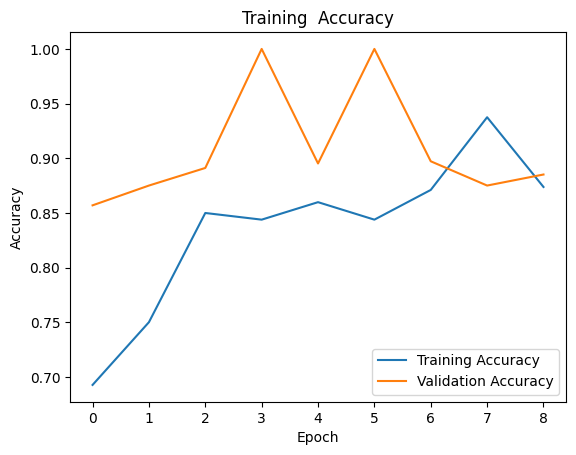

Text(0.5, 1.0, 'Training ')

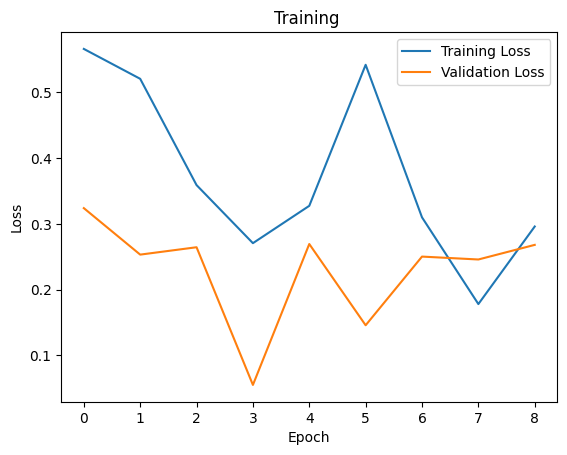

In [ ]:
import matplotlib.pyplot as plt

# Sample history dictionary as extracted from your output.
history = {
    'accuracy': [0.6926, 0.7500, 0.8499, 0.8438, 0.8598, 0.8438, 0.8710, 0.9375, 0.8737],
    'val_accuracy': [0.8569, 0.8750, 0.8911, 1.0000, 0.8952, 1.0000, 0.8972, 0.8750, 0.8851],
    'loss': [0.5656, 0.5202, 0.3588, 0.2706, 0.3273, 0.5415, 0.3098, 0.1781, 0.2959],
    'val_loss': [0.3238, 0.2532, 0.2644, 0.0553, 0.2693, 0.1459, 0.2502, 0.2458, 0.2680]
}

# Plot accuracy
plt.plot(history['accuracy'], label='Training Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training  Accuracy')
plt.show()

# Plot loss
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training ')


# Model Comparison Summary

#### Model 1: Without Duplicate Dataset
#### Train Accuracy: 79%
#### Test Accuracy: 79%
#### Precision & Recall:
####   Class 0: Precision 73%, Recall 94%
####   Class 1: Precision 92%, Recall 65%

# Model 2: Without Duplicate Dataset
#### Train Accuracy: 87%
#### Test Accuracy: 89.42%
#### Validation Accuracy: 89%
#### Better generalization and balanced metrics.

# Best Model: Model 2


#**2.CNN Model for Normalised_greyscale Dataset**



In this cell, we build a Convolutional Neural Network (CNN) to detect melanoma (skin cancer) from normalised_grayscale images.

### Steps:
1. **Load and Preprocess Data:**
   - We load the grayscale images from the dataset.
   - Resize the images to a standard size and normalize the pixel values to range from 0 to 1.

2. **Build the CNN Model:**
   - We create a CNN model with multiple layers to learn patterns in the images.
   - The model uses techniques like batch normalization, max pooling, and dropout to improve accuracy and prevent overfitting.

3. **Train the Model:**
   - The model is trained using the training data, and its performance is tested on unseen data.

4. **Evaluate the Model:**
   - After training, the model's accuracy is checked on the test dataset to see how well it performs.




In [ ]:
# Define paths to your dataset
train_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory/train'
test_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory/test'

# Define the input image size and batch size
image_size = (100,100)
batch_size = 296

# Load the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',  # Use 'int' for sparse categorical crossentropy
    shuffle=True
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='int',  # Use 'int' for sparse categorical crossentropy
    shuffle=False
)

# Normalize pixel values (0-255 -> 0-1)
normalization_layer = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Define the advanced CNN model
def create_advanced_cnn(input_shape, num_classes):
    model = models.Sequential()

    # Block 1: Convolutional Layers + Pooling
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())  # Normalize the activations to speed up training
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))  # Dropout for regularization

    # Block 2: Convolutional Layers + Pooling
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    # Block 3: Convolutional Layers + Pooling
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Block 4: Convolutional Layers + Pooling
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))

    # Flatten and Dense Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))

    # Output layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),  # Small learning rate for stability
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

# Define input shape and number of classes (Adjust num_classes based on your dataset)
input_shape = (256, 256, 3)  # Adjust based on the input image shape
num_classes = 2  # Assuming binary classification (adjust if more classes)

# Create the model
model = create_advanced_cnn(input_shape, num_classes)

# Display the model summary
model.summary()



Found 9579 files belonging to 2 classes.
Found 999 files belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 26,084,034 (99.50 MB)

 Trainable params: 26,082,050 (99.50 MB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Directory paths
new_base_dir = '/content/drive/MyDrive/melanomaAI/normalized_grayscale_directory'
train_dir = os.path.join(new_base_dir, 'train')
test_dir = os.path.join(new_base_dir, 'test')

# Image dimensions and batch size
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 32

# Image Data Generators with validation split for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of data for validation
)

# Define training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training',
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

# Define test data generator
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Define a CNN model
model = Sequential([
    Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Use EarlyStopping to stop training when validation accuracy plateaus
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // BATCH_SIZE)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Found 7664 images belonging to 2 classes.
Found 1915 images belonging to 2 classes.
Found 999 images belonging to 2 classes.
Epoch 1/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 459s 1s/step - accuracy: 0.6776 - loss: 0.5995 - val_accuracy: 0.7887 - val_loss: 0.4480
Epoch 2/15
  1/239 ━━━━━━━━━━━━━━━━━━━━ 3:50 970ms/step - accuracy: 0.8125 - loss: 0.4998

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8125 - loss: 0.4998 - val_accuracy: 0.6296 - val_loss: 0.5377
Epoch 3/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.7934 - loss: 0.4422 - val_accuracy: 0.7696 - val_loss: 0.4746
Epoch 4/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 896us/step - accuracy: 0.8125 - loss: 0.3955 - val_accuracy: 0.7778 - val_loss: 0.5131
Epoch 5/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 354s 1s/step - accuracy: 0.8090 - loss: 0.4189 - val_accuracy: 0.7924 - val_loss: 0.4327
Epoch 6/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9062 - loss: 0.3168 - val_accuracy: 0.7407 - val_loss: 0.4421
Epoch 7/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 350s 1s/step - accuracy: 0.8120 - loss: 0.4076 - val_accuracy: 0.7993 - val_loss: 0.4587
Epoch 8/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 913us/step - accuracy: 0.8438 - loss: 0.4325 - val_accuracy: 0.8148 - val_loss: 0.5018
Epoch 9/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 355s 1s/step - accuracy: 0.8268 - loss: 0.3834 - val_accuracy: 0.811

In [ ]:
import pandas as pd

# Define data for each epoch
data = {
    "Epoch": list(range(1, 16)),
    "Training Accuracy": [0.6776, 0.8125, 0.7934, 0.8125, 0.8090, 0.9062, 0.8120, 0.8438, 0.8268, 0.8750, 0.8277, 0.8125, 0.8418, 0.8438, 0.8420],
    "Training Loss": [0.5995, 0.4998, 0.4422, 0.3955, 0.4189, 0.3168, 0.4076, 0.4325, 0.3834, 0.2422, 0.3751, 0.4148, 0.3618, 0.2984, 0.3574],
    "Validation Accuracy": [0.7887, 0.6296, 0.7696, 0.7778, 0.7924, 0.7407, 0.7993, 0.8148, 0.8114, 0.8889, 0.8120, 0.9259, 0.8114, 0.7778, 0.8305],
    "Validation Loss": [0.4480, 0.5377, 0.4746, 0.5131, 0.4327, 0.4421, 0.4587, 0.5018, 0.4036, 0.2425, 0.4130, 0.1731, 0.4023, 0.4557, 0.3699]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the table
print("Epoch Results:")
print(df)

# Test results
test_accuracy = 88.81
test_loss = 0.2540
print("\nFinal Test Results:")
print(f"Test Accuracy: {test_accuracy}%")
print(f"Test Loss: {test_loss}")


Epoch Results:
    Epoch  Training Accuracy  Training Loss  Validation Accuracy  \
0       1             0.6776         0.5995               0.7887   
1       2             0.8125         0.4998               0.6296   
2       3             0.7934         0.4422               0.7696   
3       4             0.8125         0.3955               0.7778   
4       5             0.8090         0.4189               0.7924   
5       6             0.9062         0.3168               0.7407   
6       7             0.8120         0.4076               0.7993   
7       8             0.8438         0.4325               0.8148   
8       9             0.8268         0.3834               0.8114   
9      10             0.8750         0.2422               0.8889   
10     11             0.8277         0.3751               0.8120   
11     12             0.8125         0.4148               0.9259   
12     13             0.8418         0.3618               0.8114   
13     14             0.8438     

# Training and Test Results

- **Training Accuracy**: 84.2% (This is how well the model did on the training data)
- **Training Loss**: 0.3574 (This is a measure of how far the model's predictions were from the actual values during training)

- **Validation Accuracy**: 83.05% (This is how well the model did on a validation set during training)
- **Validation Loss**: 0.3699 (This is how far the model's predictions were from the actual values during validation)

- **Test Accuracy**: 88.81% (This is how well the model performed on new, unseen test data)
- **Test Loss**: 0.2540 (This is the error rate on the test data)

### Summary:
The model performed well with an **88.81% accuracy** on the test data, which shows it can make accurate predictions. The training and validation performance were also good, but there was some fluctuation during training.


# **3.CNN Model for RGB_Aug_Dataset**

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 582ms/step - accuracy: 0.7796 - loss: 0.4622Epoch 1/10 - accuracy: 0.8242 - val_accuracy: 0.8881
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 882s 587ms/step - accuracy: 0.7796 - loss: 0.4622 - val_accuracy: 0.8881 - val_loss: 0.2745
Epoch 2/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 11:01 443ms/step - accuracy: 0.9375 - loss: 0.2065Epoch 2/10 - accuracy: 0.9375 - val_accuracy: 0.5714
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.9375 - loss: 0.2065 - val_accuracy: 0.5714 - val_loss: 1.5243
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 533ms/step - accuracy: 0.8688 - loss: 0.3185Epoch 3/10 - accuracy: 0.8704 - val_accuracy: 0.9012
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 803s 536ms/step - accuracy: 0.8688 - loss: 0.3185 - val_accuracy: 0.9012 - val_loss: 0.2437
Epoch 4/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 11:06 446ms/step - accuracy: 0.9375 - loss: 0.1373Epoch 4/10 - accuracy: 0.9375 - val_accuracy: 0.2857
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.9375 - loss: 0.1373 - val_accuracy: 0.2857 - val_loss: 1.7734
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.8780 - loss: 0.3005Epoch 5/10 - accuracy: 0.8806 - val_accuracy: 0.9022
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 853s 530ms/step - accuracy: 0.8780 - loss: 0.3005 - val_accuracy: 0.9022 - val_loss: 0.2498
Epoch 6/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 11:03 444ms/step - accuracy: 0.9062 - loss: 0.2963Epoch 6/10 - accuracy: 0.9062 - val_accuracy: 0.4286
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 32us/step - accuracy: 0.9062 - loss: 

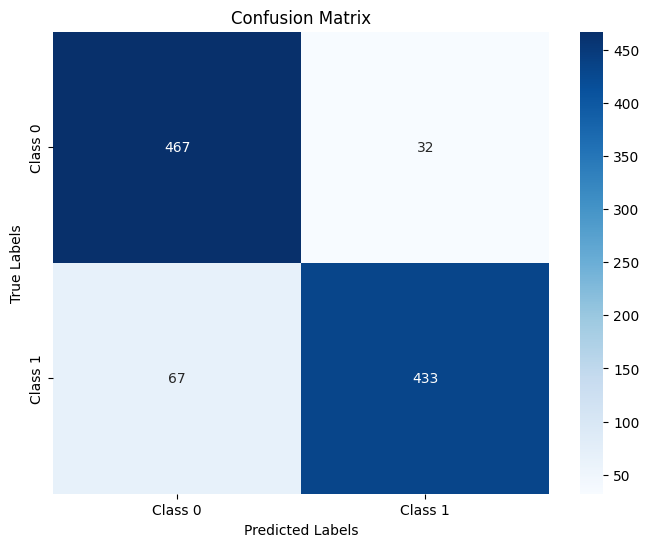


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.94      0.90       499
     Class 1       0.93      0.87      0.90       500

    accuracy                           0.90       999
   macro avg       0.90      0.90      0.90       999
weighted avg       0.90      0.90      0.90       999



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BATCH_SIZE = 32
IMG_SIZE = (128, 128)  # Adjust for faster training
EPOCHS = 10

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/rgb-aug/RGBAug_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

validation_generator = val_datagen.flow_from_directory(
    "/kaggle/input/withoutdup-dataset/without_duplicate_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False  # Keep shuffle=False for validation data to ensure proper evaluation
)

# Model Architecture
model = Sequential([
    tf.keras.Input(shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    Conv2D(32, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Model Compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

# Custom Callback for Accuracy Display
class AccuracyDisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{EPOCHS} - accuracy: {logs['accuracy']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}")

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[AccuracyDisplayCallback()]
)

# Evaluate Model
print("\nFinal Evaluation on Validation Data:")
final_loss, final_accuracy = model.evaluate(validation_generator)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Predictions and Confusion Matrix
print("\nGenerating Confusion Matrix:")
validation_generator.reset()
predictions = (model.predict(validation_generator) > 0.5).astype(int)  # Threshold at 0.5 for binary classification
true_labels = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Class 0", "Class 1"]))


## Key Insights from Classification Report

- **Precision**: Class 0 = 87%, Class 1 = 93%  
  How often predictions for a class are correct.

- **Recall**: Class 0 = 94%, Class 1 = 87%  
  How well the model identifies all instances of a class.

- **F1-Score**: Both classes = 90%  
  Balance between precision and recall.

- **Accuracy**: 90%  
  Overall correct predictions.

- **Support**: Class 0 = 499 samples, Class 1 = 500 samples.  

### Summary:
The model performs well, with balanced precision and recall, achieving 90% accuracy for the task.


# **4.CNN using Normalised_gray_Aug_datset**

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.5812 - loss: 0.6780Epoch 1/10 - accuracy: 0.6167 - val_accuracy: 0.7460
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1368s 909ms/step - accuracy: 0.5812 - loss: 0.6780 - val_accuracy: 0.7460 - val_loss: 0.5318
Epoch 2/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 20:07 808ms/step - accuracy: 0.6875 - loss: 0.6236

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 2/10 - accuracy: 0.6875 - val_accuracy: 0.7143
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step - accuracy: 0.6875 - loss: 0.6236 - val_accuracy: 0.7143 - val_loss: 0.5518
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.6599 - loss: 0.5923Epoch 3/10 - accuracy: 0.6712 - val_accuracy: 0.7571
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1355s 905ms/step - accuracy: 0.6599 - loss: 0.5923 - val_accuracy: 0.7571 - val_loss: 0.4864
Epoch 4/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 20:47 834ms/step - accuracy: 0.7188 - loss: 0.6621Epoch 4/10 - accuracy: 0.7188 - val_accuracy: 0.7143
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step - accuracy: 0.7188 - loss: 0.6621 - val_accuracy: 0.7143 - val_loss: 0.5604
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.6778 - loss: 0.5845Epoch 5/10 - accuracy: 0.6816 - val_accuracy: 0.8125
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1350s 901ms/step - accuracy: 0.6778 - loss: 0.5845 - val_accuracy: 0.8125 - val_loss: 0.5205
Epoch 6/10
   1/1496 ━━━━━━━

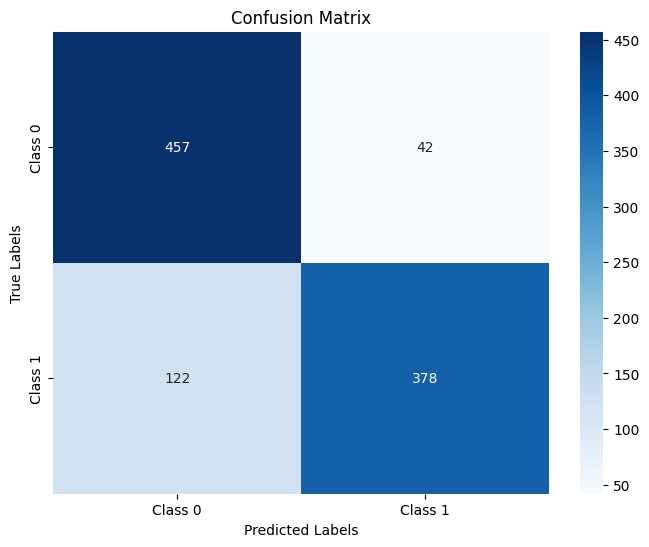


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.92      0.85       499
     Class 1       0.90      0.76      0.82       500

    accuracy                           0.84       999
   macro avg       0.84      0.84      0.83       999
weighted avg       0.84      0.84      0.83       999



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BATCH_SIZE = 32
IMG_SIZE = (128, 128)  # Adjust for faster training
EPOCHS = 10

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/Nor_Aug/Normalised_aug/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

validation_generator = val_datagen.flow_from_directory(
    "/kaggle/input/withoutdup-dataset/without_duplicate_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False  # Keep shuffle=False for validation data to ensure proper evaluation
)



# Freeze the base model layers
base_model.trainable = False

# Build the final model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Model Compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

# Custom Callback for Accuracy Display
class AccuracyDisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{EPOCHS} - accuracy: {logs['accuracy']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}")

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[AccuracyDisplayCallback()]
)

# Evaluate Model
print("\nFinal Evaluation on Validation Data:")
final_loss, final_accuracy = model.evaluate(validation_generator)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Predictions and Confusion Matrix
print("\nGenerating Confusion Matrix:")
validation_generator.reset()
predictions = (model.predict(validation_generator) > 0.5).astype(int)  # Threshold at 0.5 for binary classification
true_labels = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Class 0", "Class 1"]))


# **5.Model using Vgg16**

In [ ]:
from tensorflow.keras.applications import VGG16

# Path to the weights file in your dataset
weights_path = '/kaggle/input/vggggg/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Load the VGG16 model without the top layers (classification layers)
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(224, 224, 3))

# Summary of the model to check the architecture
base_model.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Found 47895 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 890ms/step - accuracy: 0.5812 - loss: 0.6780Epoch 1/10 - accuracy: 0.6167 - val_accuracy: 0.7460
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1368s 909ms/step - accuracy: 0.5812 - loss: 0.6780 - val_accuracy: 0.7460 - val_loss: 0.5318
Epoch 2/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 20:07 808ms/step - accuracy: 0.6875 - loss: 0.6236

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


Epoch 2/10 - accuracy: 0.6875 - val_accuracy: 0.7143
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step - accuracy: 0.6875 - loss: 0.6236 - val_accuracy: 0.7143 - val_loss: 0.5518
Epoch 3/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 888ms/step - accuracy: 0.6599 - loss: 0.5923Epoch 3/10 - accuracy: 0.6712 - val_accuracy: 0.7571
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1355s 905ms/step - accuracy: 0.6599 - loss: 0.5923 - val_accuracy: 0.7571 - val_loss: 0.4864
Epoch 4/10
   1/1496 ━━━━━━━━━━━━━━━━━━━━ 20:47 834ms/step - accuracy: 0.7188 - loss: 0.6621Epoch 4/10 - accuracy: 0.7188 - val_accuracy: 0.7143
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1s 181us/step - accuracy: 0.7188 - loss: 0.6621 - val_accuracy: 0.7143 - val_loss: 0.5604
Epoch 5/10
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 0s 884ms/step - accuracy: 0.6778 - loss: 0.5845Epoch 5/10 - accuracy: 0.6816 - val_accuracy: 0.8125
1496/1496 ━━━━━━━━━━━━━━━━━━━━ 1350s 901ms/step - accuracy: 0.6778 - loss: 0.5845 - val_accuracy: 0.8125 - val_loss: 0.5205
Epoch 6/10
   1/1496 ━━━━━━━

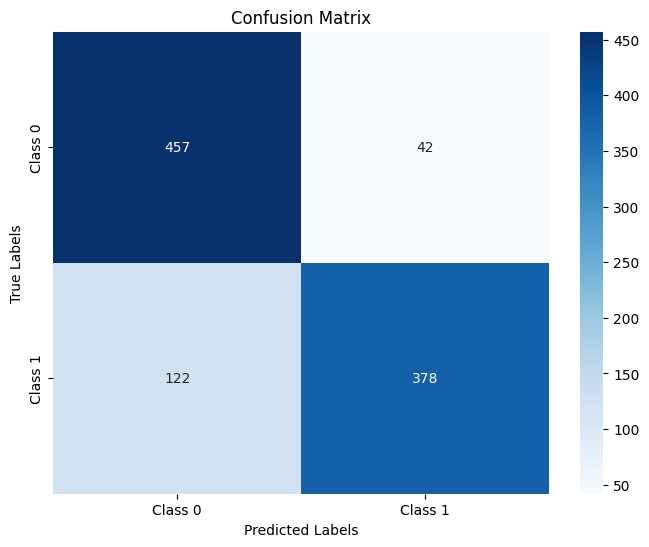


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.79      0.92      0.85       499
     Class 1       0.90      0.76      0.82       500

    accuracy                           0.84       999
   macro avg       0.84      0.84      0.83       999
weighted avg       0.84      0.84      0.83       999



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
BATCH_SIZE = 32
IMG_SIZE = (128, 128)  # Adjust for faster training
EPOCHS = 10

# Data Augmentation and Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/rgb-aug/RGBAug_dataset/train",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

validation_generator = val_datagen.flow_from_directory(
    "/kaggle/input/withoutdup-dataset/without_duplicate_dataset/test",
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False  # Keep shuffle=False for validation data to ensure proper evaluation
)

base_model = ResNet50(weights='/kaggle/input/vggggg/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5', include_top=False, input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))


# Freeze the base model layers
base_model.trainable = False

# Build the final model on top of the base model
model = Sequential([
    base_model,
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")
])

# Model Compilation
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()

# Custom Callback for Accuracy Display
class AccuracyDisplayCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}/{EPOCHS} - accuracy: {logs['accuracy']:.4f} - val_accuracy: {logs['val_accuracy']:.4f}")

# Train Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[AccuracyDisplayCallback()]
)

# Evaluate Model
print("\nFinal Evaluation on Validation Data:")
final_loss, final_accuracy = model.evaluate(validation_generator)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Predictions and Confusion Matrix
print("\nGenerating Confusion Matrix:")
validation_generator.reset()
predictions = (model.predict(validation_generator) > 0.5).astype(int)  # Threshold at 0.5 for binary classification
true_labels = validation_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(true_labels, predictions, target_names=["Class 0", "Class 1"]))


In [ ]:
import pandas as pd
from IPython.display import display

# Data for the table
model_data = {
    "Model ": [
        "CNNmodel_using_RGB_dataset",
        "CNNmodel_using_Normalised_grayscle_dataset",
        "CNNModel for RGB_Aug_Dataset",
        "CNNmodel for Gray_Aug_Dataset",
        "Model Using Vgg-16"
    ],
    "Accuracy": ["89.42%", "88.81%", "90.09%", "83.58","84.00%"]
}

# Create a DataFrame
df = pd.DataFrame(model_data)

# Display the table in Colab
display(df)


Model  Accuracy
0                  CNNmodel_using_RGB_dataset   89.42%
1  CNNmodel_using_Normalised_grayscle_dataset   88.81%
2                CNNModel for RGB_Aug_Dataset   90.09%
3               CNNmodel for Gray_Aug_Dataset    83.58
4                          Model Using Vgg-16   84.00%

In [ ]:
import pandas as pd
from tabulate import tabulate

In [ ]:
# Data for Classification Reports
classification_report_1 = {
    'Model': ['RGB_CNNModel', 'RGB_CNNModel'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.90, 0.87],
    'Recall': [0.87, 0.90],
    'F1-Score': [0.88, 0.88],
    'Support': [499, 500]
}

classification_report_2 = {
    'Model': ['NOR_CNNModel', 'NOR_CNNModel'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.73, 0.92],
    'Recall': [0.94, 0.65],
    'F1-Score': [0.82, 0.76],
    'Support': [499, 500]
}

classification_report_3 = {
    'Model': ['NORAUG_CNNModel', 'NORAUG_CNNModel'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.79, 0.90],
    'Recall': [0.92, 0.76],
    'F1-Score': [0.85, 0.82],
    'Support': [499, 500]
}

classification_report_4 = {
    'Model': ['RGBAUG_CNNModel', 'RGBAUG_CNNModel'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.87, 0.93],
    'Recall': [0.94, 0.87],
    'F1-Score': [0.90, 0.90],
    'Support': [499, 500]
}

classification_report_5 = {
    'Model': ['VGGG16_Model', 'VGGG16_Model 5'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.79, 0.90],
    'Recall': [0.92, 0.76],
    'F1-Score': [0.85, 0.82],
    'Support': [499, 500]
}
classification_report_5 = {
    'Model': ['VGGG16_Model', 'VGGG16_Model 5'],
    'Class': ['Class 0', 'Class 1'],
    'Precision': [0.79, 0.90],
    'Recall': [0.92, 0.76],
    'F1-Score': [0.85, 0.82],
    'Support': [499, 500],


}



# Function to calculate the accuracy for each report
def calculate_accuracy(recall_class_0, recall_class_1, support_class_0, support_class_1):
    correct_predictions = (recall_class_0 * support_class_0) + (recall_class_1 * support_class_1)
    total_predictions = support_class_0 + support_class_1
    return correct_predictions / total_predictions

# Function to add accuracy to the DataFrame
def add_accuracy_to_df(df, recall_0, recall_1, support_0, support_1):
    accuracy = calculate_accuracy(recall_0, recall_1, support_0, support_1)
    df['Accuracy'] = [accuracy, accuracy]  # Add the accuracy value to all rows for the same report
    return df

# Convert classification reports to pandas DataFrames and add accuracy
df_report1 = pd.DataFrame(classification_report_1)
df_report1 = add_accuracy_to_df(df_report1, 0.87, 0.90, 499, 500)

df_report2 = pd.DataFrame(classification_report_2)
df_report2 = add_accuracy_to_df(df_report2, 0.94, 0.65, 499, 500)

df_report3 = pd.DataFrame(classification_report_3)
df_report3 = add_accuracy_to_df(df_report3, 0.92, 0.76, 499, 500)

df_report4 = pd.DataFrame(classification_report_4)
df_report4 = add_accuracy_to_df(df_report4, 0.94, 0.87, 499, 500)

df_report5 = pd.DataFrame(classification_report_5)
df_report5 = add_accuracy_to_df(df_report5, 0.84, 0.83, 499, 500)

# Displaying Classification Reports with Accuracy and Model Titles
def print_classification_report(df, report_number):
    print(f"\nClassification Report of model {report_number}:")
    print(tabulate(df, headers='keys', tablefmt='grid', showindex=False))

# Display the classification reports
print_classification_report(df_report1, 1)
print_classification_report(df_report2, 2)
print_classification_report(df_report3, 3)
print_classification_report(df_report4, 4)
print_classification_report(df_report5, 5)



Classification Report of model 1:
+--------------+---------+-------------+----------+------------+-----------+------------+
| Model        | Class   |   Precision |   Recall |   F1-Score |   Support |   Accuracy |
+==============+=========+=============+==========+============+===========+============+
| RGB_CNNModel | Class 0 |        0.9  |     0.87 |       0.88 |       499 |   0.885015 |
+--------------+---------+-------------+----------+------------+-----------+------------+
| RGB_CNNModel | Class 1 |        0.87 |     0.9  |       0.88 |       500 |   0.885015 |
+--------------+---------+-------------+----------+------------+-----------+------------+

Classification Report of model 2:
+--------------+---------+-------------+----------+------------+-----------+------------+
| Model        | Class   |   Precision |   Recall |   F1-Score |   Support |   Accuracy |
+==============+=========+=============+==========+============+===========+============+
| NOR_CNNModel | Class 0 |    

BEST MODEL =MODEL 3 (CNNMODEL FOR RGB_AUG-DATASET WITH 90.09% ACCURACY)

# **Confusion Matrix for Best Model**


Confusion Matrix:
         Predicted Class 0  Predicted Class 1
Class 0                487                 12
Class 1                 78                422


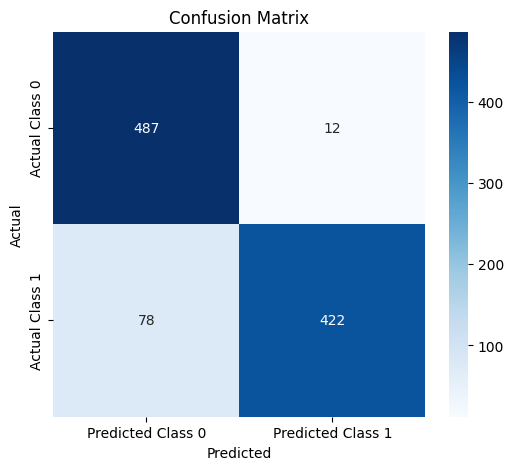

In [ ]:
# Confusion Matrix
confusion_matrix = [[487, 12], [78, 422]]

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(confusion_matrix,
                     index=['Class 0', 'Class 1'],
                     columns=['Predicted Class 0', 'Predicted Class 1'])

# Print Confusion Matrix
print("\nConfusion Matrix:")
print(df_cm)

# Visualize the Confusion Matrix as a heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Class 0', 'Predicted Class 1'],
            yticklabels=['Actual Class 0', 'Actual Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Plotting the loss and validation loss**

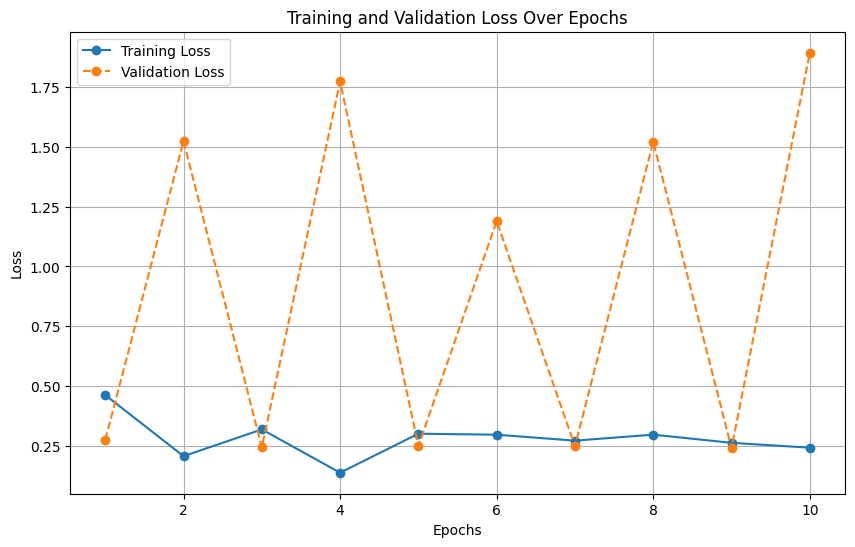

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided log
epochs = list(range(1, 11))  # 1 to 10 epochs
loss = [0.4622, 0.2065, 0.3185, 0.1373, 0.3005, 0.2963, 0.2714, 0.2965, 0.2623, 0.2420]
val_loss = [0.2745, 1.5243, 0.2437, 1.7734, 0.2498, 1.1891, 0.2482, 1.5210, 0.2402, 1.8936]

# Plotting the loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label="Training Loss", marker='o', linestyle='-')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o', linestyle='--')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Epochs")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from IPython.display import display, HTML

closing_statement = """
<div style="font-family: Arial, sans-serif; border: 2px solid #4CAF50; border-radius: 10px; padding: 20px; background-color: #f9f9f9; color: #333;">
    <h2 style="color: #4CAF50; text-align: center;">MelanoAI: Intelligent Skin Cancer Detection System</h2>
    <p style="font-size: 16px; line-height: 1.6;">
        <i>"In the fight against skin cancer, early detection saves lives. MelanoAI represents the convergence of
        cutting-edge artificial intelligence and compassionate healthcare, designed to empower medical professionals
        and patients alike. With its ability to analyze skin lesions quickly, accurately, and reliably, MelanoAI
        takes us one step closer to a world where no life is lost due to late diagnosis."</i>
    </p>
    <p style="font-size: 16px; font-weight: bold; text-align: center;">
        This is not just technology; it’s hope for a healthier, brighter future.<br>
        Together, let’s harness the power of AI to transform the landscape of skin cancer detection
        and pave the way for smarter, faster, and more accessible care.<br>
        <span style="color: #4CAF50;">Thank you!</span>
    </p>
</div>
"""

display(HTML(closing_statement))
